<a href="https://colab.research.google.com/github/Alriyan1/yolov8_tutorial/blob/main/football_ai_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Oct  7 06:32:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.0/882.0 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
!pip install -q git+https://github.com/roboflow/sports.git

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.0 MB/s eta 0:00:00


In [4]:
!gdown -O "0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
!gdown -O "2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf"
!gdown -O "08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"
!gdown -O "573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
!gdown -O "121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF
To: /content/0bfacc_0.mp4
100% 19.9M/19.9M [00:00<00:00, 21.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf
To: /content/2e57b9_0.mp4
100% 21.1M/21.1M [00:00<00:00, 26.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-
To: /content/08fd33_0.mp4
100% 19.9M/19.9M [00:00<00:00, 65.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU
To: /content/573e61_0.mp4
100% 18.9M/18.9M [00:00<00:00, 25.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 78.9MB/s]


In [5]:
import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

ball, player, goalkeeper, referees detection

In [11]:
from ultralytics import YOLO
model = YOLO("best.pt")

In [12]:
import supervision as sv
from tqdm import tqdm


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 94.7ms
Speed: 16.5ms preprocess, 94.7ms inference, 846.9ms postprocess per image at shape (1, 3, 640, 1088)


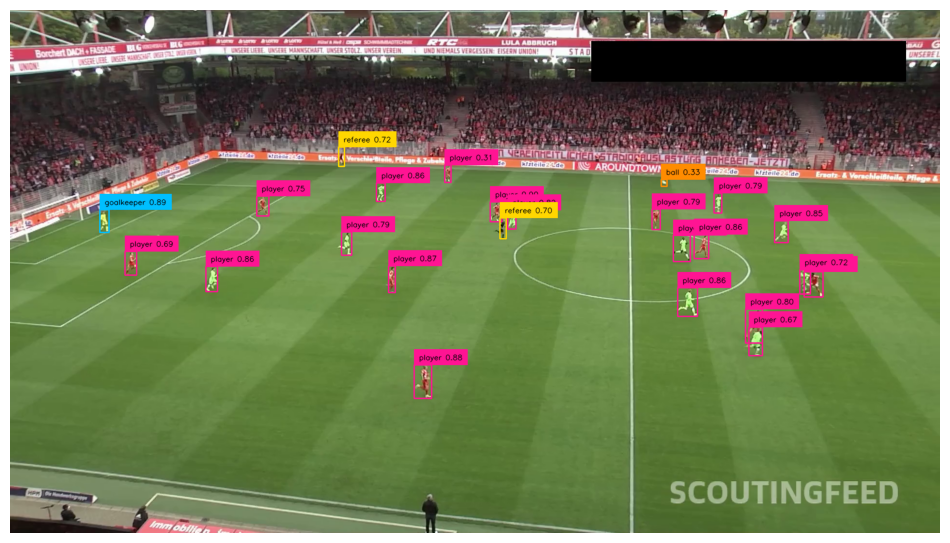

In [13]:
SOURCE_VIDEO_PATH = "/content/121364_0.mp4"

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

box_annotator=sv.BoxAnnotator(
    color = sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator= sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color = sv.Color.BLACK
)

results = model(frame, conf = 0.3)[0]
detections = sv.Detections.from_ultralytics(results)

labels = [
    f"{class_name} {confidence:0.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annotated_frame=frame.copy()
annotated_frame = box_annotator.annotate(frame, detections)
annotated_frame = label_annotator.annotate(annotated_frame, detections,labels=labels)

sv.plot_image(annotated_frame)

In [14]:
SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
TARGET_VIDEO_PATH = "/content/121364_0_results_1.mp4"

box_annotator=sv.BoxAnnotator(
    color = sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator= sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color = sv.Color.BLACK
)

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

with video_sink:
  for frame in tqdm(frame_generator, total=video_info.total_frames):
    results = model(frame, conf = 0.3)[0]
    detections = sv.Detections.from_ultralytics(results)

    labels = [
        f"{class_name} {confidence:0.2f}"
        for class_name, confidence
        in zip(detections['class_name'], detections.confidence)
    ]

    annotated_frame=frame.copy()
    annotated_frame = box_annotator.annotate(frame, detections)
    annotated_frame = label_annotator.annotate(annotated_frame, detections,labels=labels)
    video_sink.write_frame(annotated_frame)

  0%|          | 0/750 [00:00<?, ?it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 87.4ms
Speed: 10.0ms preprocess, 87.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


  0%|          | 1/750 [00:00<02:39,  4.69it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 87.4ms
Speed: 8.3ms preprocess, 87.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


  0%|          | 2/750 [00:00<02:11,  5.67it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 82.0ms
Speed: 8.2ms preprocess, 82.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  0%|          | 3/750 [00:00<01:59,  6.26it/s]


0: 640x1088 2 goalkeepers, 21 players, 82.3ms
Speed: 7.2ms preprocess, 82.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  1%|          | 4/750 [00:00<01:49,  6.80it/s]


0: 640x1088 2 goalkeepers, 21 players, 84.0ms
Speed: 7.3ms preprocess, 84.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  1%|          | 5/750 [00:00<01:44,  7.12it/s]


0: 640x1088 2 goalkeepers, 23 players, 2 referees, 83.6ms
Speed: 7.9ms preprocess, 83.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  1%|          | 6/750 [00:00<01:41,  7.36it/s]


0: 640x1088 1 ball, 4 goalkeepers, 19 players, 4 referees, 82.2ms
Speed: 7.4ms preprocess, 82.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  1%|          | 7/750 [00:01<01:38,  7.57it/s]


0: 640x1088 2 goalkeepers, 20 players, 2 referees, 83.0ms
Speed: 7.4ms preprocess, 83.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  1%|          | 8/750 [00:01<01:36,  7.72it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 3 referees, 83.4ms
Speed: 7.3ms preprocess, 83.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  1%|          | 9/750 [00:01<01:34,  7.83it/s]


0: 640x1088 1 goalkeeper, 22 players, 1 referee, 81.3ms
Speed: 7.0ms preprocess, 81.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 1088)


  1%|▏         | 10/750 [00:01<01:35,  7.79it/s]


0: 640x1088 1 goalkeeper, 22 players, 1 referee, 82.6ms
Speed: 8.7ms preprocess, 82.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  1%|▏         | 11/750 [00:01<01:34,  7.86it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 83.5ms
Speed: 7.0ms preprocess, 83.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  2%|▏         | 12/750 [00:01<01:33,  7.86it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 84.2ms
Speed: 7.5ms preprocess, 84.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  2%|▏         | 13/750 [00:01<01:36,  7.66it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 82.9ms
Speed: 8.4ms preprocess, 82.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  2%|▏         | 14/750 [00:01<01:34,  7.76it/s]


0: 640x1088 2 goalkeepers, 20 players, 2 referees, 83.9ms
Speed: 8.3ms preprocess, 83.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  2%|▏         | 15/750 [00:02<01:35,  7.70it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 85.0ms
Speed: 7.9ms preprocess, 85.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  2%|▏         | 16/750 [00:02<01:34,  7.79it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 1 referee, 83.7ms
Speed: 7.3ms preprocess, 83.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  2%|▏         | 17/750 [00:02<01:33,  7.88it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 1 referee, 82.2ms
Speed: 7.5ms preprocess, 82.2ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 1088)


  2%|▏         | 18/750 [00:02<01:36,  7.60it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 83.3ms
Speed: 9.9ms preprocess, 83.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  3%|▎         | 19/750 [00:02<01:34,  7.70it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 83.3ms
Speed: 7.4ms preprocess, 83.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


  3%|▎         | 20/750 [00:02<01:33,  7.82it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 82.7ms
Speed: 7.3ms preprocess, 82.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  3%|▎         | 21/750 [00:02<01:32,  7.92it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 84.4ms
Speed: 6.9ms preprocess, 84.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  3%|▎         | 22/750 [00:02<01:31,  7.93it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 82.7ms
Speed: 7.9ms preprocess, 82.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


  3%|▎         | 23/750 [00:03<01:31,  7.98it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 82.5ms
Speed: 7.2ms preprocess, 82.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  3%|▎         | 24/750 [00:03<01:31,  7.97it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 82.9ms
Speed: 7.6ms preprocess, 82.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  3%|▎         | 25/750 [00:03<01:30,  8.00it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 83.0ms
Speed: 8.0ms preprocess, 83.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


  3%|▎         | 26/750 [00:03<01:34,  7.68it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 82.3ms
Speed: 7.7ms preprocess, 82.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  4%|▎         | 27/750 [00:03<01:32,  7.85it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 82.0ms
Speed: 7.7ms preprocess, 82.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  4%|▎         | 28/750 [00:03<01:31,  7.90it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 82.8ms
Speed: 7.4ms preprocess, 82.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  4%|▍         | 29/750 [00:03<01:30,  8.00it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 84.3ms
Speed: 5.9ms preprocess, 84.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  4%|▍         | 30/750 [00:03<01:30,  7.99it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 84.1ms
Speed: 8.7ms preprocess, 84.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  4%|▍         | 31/750 [00:04<01:30,  7.98it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 82.3ms
Speed: 7.3ms preprocess, 82.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  4%|▍         | 32/750 [00:04<01:29,  8.00it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 84.9ms
Speed: 7.3ms preprocess, 84.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  4%|▍         | 33/750 [00:04<01:30,  7.91it/s]


0: 640x1088 1 goalkeeper, 23 players, 2 referees, 83.2ms
Speed: 10.1ms preprocess, 83.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


  5%|▍         | 34/750 [00:04<01:31,  7.79it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 82.0ms
Speed: 7.3ms preprocess, 82.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  5%|▍         | 35/750 [00:04<01:30,  7.88it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 82.8ms
Speed: 7.2ms preprocess, 82.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  5%|▍         | 36/750 [00:04<01:29,  7.94it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 81.7ms
Speed: 7.4ms preprocess, 81.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  5%|▍         | 37/750 [00:04<01:29,  7.96it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 81.1ms
Speed: 5.9ms preprocess, 81.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  5%|▌         | 38/750 [00:04<01:28,  8.01it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 81.7ms
Speed: 7.9ms preprocess, 81.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  5%|▌         | 39/750 [00:05<01:28,  8.06it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 81.5ms
Speed: 7.7ms preprocess, 81.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  5%|▌         | 40/750 [00:05<01:27,  8.10it/s]


0: 640x1088 1 goalkeeper, 23 players, 2 referees, 81.8ms
Speed: 7.2ms preprocess, 81.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  5%|▌         | 41/750 [00:05<01:27,  8.12it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 85.4ms
Speed: 7.4ms preprocess, 85.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


  6%|▌         | 42/750 [00:05<01:29,  7.89it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 82.6ms
Speed: 7.4ms preprocess, 82.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  6%|▌         | 43/750 [00:05<01:29,  7.90it/s]


0: 640x1088 1 goalkeeper, 22 players, 1 referee, 84.1ms
Speed: 7.2ms preprocess, 84.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  6%|▌         | 44/750 [00:05<01:29,  7.91it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 81.7ms
Speed: 8.3ms preprocess, 81.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  6%|▌         | 45/750 [00:05<01:28,  7.95it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 83.0ms
Speed: 7.0ms preprocess, 83.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  6%|▌         | 46/750 [00:05<01:28,  7.98it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 83.8ms
Speed: 8.1ms preprocess, 83.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  6%|▋         | 47/750 [00:06<01:28,  7.93it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 83.7ms
Speed: 7.3ms preprocess, 83.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  6%|▋         | 48/750 [00:06<01:28,  7.92it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 83.8ms
Speed: 7.0ms preprocess, 83.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  7%|▋         | 49/750 [00:06<01:28,  7.88it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 82.4ms
Speed: 7.5ms preprocess, 82.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  7%|▋         | 50/750 [00:06<01:29,  7.86it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 82.8ms
Speed: 7.4ms preprocess, 82.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  7%|▋         | 51/750 [00:06<01:29,  7.83it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 84.9ms
Speed: 7.5ms preprocess, 84.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  7%|▋         | 52/750 [00:06<01:29,  7.83it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 82.5ms
Speed: 7.1ms preprocess, 82.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  7%|▋         | 53/750 [00:06<01:28,  7.88it/s]


0: 640x1088 1 ball, 1 goalkeeper, 22 players, 2 referees, 82.9ms
Speed: 6.0ms preprocess, 82.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  7%|▋         | 54/750 [00:06<01:27,  7.92it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 82.9ms
Speed: 7.1ms preprocess, 82.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


  7%|▋         | 55/750 [00:07<01:27,  7.97it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 83.5ms
Speed: 7.4ms preprocess, 83.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  7%|▋         | 56/750 [00:07<01:27,  7.97it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 85.3ms
Speed: 7.1ms preprocess, 85.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


  8%|▊         | 57/750 [00:07<01:28,  7.82it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 82.5ms
Speed: 7.2ms preprocess, 82.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  8%|▊         | 58/750 [00:07<01:27,  7.91it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 83.2ms
Speed: 8.5ms preprocess, 83.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  8%|▊         | 59/750 [00:07<01:27,  7.94it/s]


0: 640x1088 1 ball, 1 goalkeeper, 22 players, 2 referees, 85.7ms
Speed: 10.0ms preprocess, 85.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  8%|▊         | 60/750 [00:07<01:28,  7.76it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 82.1ms
Speed: 7.9ms preprocess, 82.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  8%|▊         | 61/750 [00:07<01:27,  7.83it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 83.9ms
Speed: 7.9ms preprocess, 83.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


  8%|▊         | 62/750 [00:07<01:27,  7.87it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 83.0ms
Speed: 7.6ms preprocess, 83.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


  8%|▊         | 63/750 [00:08<01:28,  7.79it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 83.3ms
Speed: 5.8ms preprocess, 83.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


  9%|▊         | 64/750 [00:08<01:30,  7.56it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 81.1ms
Speed: 9.9ms preprocess, 81.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


  9%|▊         | 65/750 [00:08<01:30,  7.55it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 81.7ms
Speed: 10.6ms preprocess, 81.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


  9%|▉         | 66/750 [00:08<01:33,  7.33it/s]


0: 640x1088 1 goalkeeper, 23 players, 1 referee, 86.2ms
Speed: 14.2ms preprocess, 86.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


  9%|▉         | 67/750 [00:08<01:36,  7.10it/s]


0: 640x1088 22 players, 1 referee, 84.2ms
Speed: 8.7ms preprocess, 84.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


  9%|▉         | 68/750 [00:08<01:36,  7.06it/s]


0: 640x1088 21 players, 1 referee, 84.6ms
Speed: 7.3ms preprocess, 84.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


  9%|▉         | 69/750 [00:08<01:37,  7.02it/s]


0: 640x1088 21 players, 1 referee, 85.1ms
Speed: 8.0ms preprocess, 85.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


  9%|▉         | 70/750 [00:09<01:37,  6.95it/s]


0: 640x1088 21 players, 1 referee, 84.8ms
Speed: 7.5ms preprocess, 84.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


  9%|▉         | 71/750 [00:09<01:38,  6.89it/s]


0: 640x1088 23 players, 2 referees, 85.6ms
Speed: 11.0ms preprocess, 85.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 10%|▉         | 72/750 [00:09<01:39,  6.84it/s]


0: 640x1088 24 players, 2 referees, 82.8ms
Speed: 7.0ms preprocess, 82.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 10%|▉         | 73/750 [00:09<01:35,  7.08it/s]


0: 640x1088 23 players, 2 referees, 69.5ms
Speed: 7.2ms preprocess, 69.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 10%|▉         | 74/750 [00:09<01:33,  7.22it/s]


0: 640x1088 23 players, 2 referees, 83.9ms
Speed: 7.3ms preprocess, 83.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 10%|█         | 75/750 [00:09<01:33,  7.20it/s]


0: 640x1088 20 players, 2 referees, 87.5ms
Speed: 7.2ms preprocess, 87.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 10%|█         | 76/750 [00:09<01:35,  7.05it/s]


0: 640x1088 20 players, 2 referees, 82.6ms
Speed: 8.2ms preprocess, 82.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 10%|█         | 77/750 [00:10<01:36,  7.00it/s]


0: 640x1088 20 players, 2 referees, 81.8ms
Speed: 8.8ms preprocess, 81.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 10%|█         | 78/750 [00:10<01:35,  7.03it/s]


0: 640x1088 20 players, 2 referees, 83.9ms
Speed: 13.6ms preprocess, 83.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 1088)


 11%|█         | 79/750 [00:10<01:37,  6.85it/s]


0: 640x1088 20 players, 2 referees, 84.4ms
Speed: 12.4ms preprocess, 84.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 11%|█         | 80/750 [00:10<01:40,  6.68it/s]


0: 640x1088 20 players, 2 referees, 82.8ms
Speed: 7.6ms preprocess, 82.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 11%|█         | 81/750 [00:10<01:41,  6.56it/s]


0: 640x1088 20 players, 2 referees, 83.0ms
Speed: 9.9ms preprocess, 83.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 11%|█         | 82/750 [00:10<01:42,  6.55it/s]


0: 640x1088 20 players, 2 referees, 83.7ms
Speed: 16.4ms preprocess, 83.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 11%|█         | 83/750 [00:11<01:42,  6.52it/s]


0: 640x1088 20 players, 2 referees, 82.7ms
Speed: 10.7ms preprocess, 82.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 11%|█         | 84/750 [00:11<01:36,  6.88it/s]


0: 640x1088 20 players, 2 referees, 77.2ms
Speed: 6.9ms preprocess, 77.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 11%|█▏        | 85/750 [00:11<01:32,  7.22it/s]


0: 640x1088 22 players, 2 referees, 84.8ms
Speed: 7.2ms preprocess, 84.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 11%|█▏        | 86/750 [00:11<01:31,  7.29it/s]


0: 640x1088 21 players, 2 referees, 82.5ms
Speed: 9.5ms preprocess, 82.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 12%|█▏        | 87/750 [00:11<01:29,  7.42it/s]


0: 640x1088 21 players, 2 referees, 83.7ms
Speed: 7.6ms preprocess, 83.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 12%|█▏        | 88/750 [00:11<01:27,  7.58it/s]


0: 640x1088 21 players, 2 referees, 84.5ms
Speed: 7.3ms preprocess, 84.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 12%|█▏        | 89/750 [00:11<01:27,  7.53it/s]


0: 640x1088 20 players, 2 referees, 82.3ms
Speed: 7.5ms preprocess, 82.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 12%|█▏        | 90/750 [00:11<01:26,  7.64it/s]


0: 640x1088 20 players, 2 referees, 84.9ms
Speed: 7.8ms preprocess, 84.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 12%|█▏        | 91/750 [00:12<01:26,  7.63it/s]


0: 640x1088 20 players, 2 referees, 83.9ms
Speed: 10.1ms preprocess, 83.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 12%|█▏        | 92/750 [00:12<01:25,  7.72it/s]


0: 640x1088 20 players, 2 referees, 83.9ms
Speed: 7.9ms preprocess, 83.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 12%|█▏        | 93/750 [00:12<01:25,  7.69it/s]


0: 640x1088 21 players, 2 referees, 83.7ms
Speed: 9.8ms preprocess, 83.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 13%|█▎        | 94/750 [00:12<01:27,  7.54it/s]


0: 640x1088 1 ball, 20 players, 3 referees, 84.4ms
Speed: 7.6ms preprocess, 84.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 13%|█▎        | 95/750 [00:12<01:25,  7.68it/s]


0: 640x1088 1 ball, 20 players, 3 referees, 82.0ms
Speed: 7.7ms preprocess, 82.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 13%|█▎        | 96/750 [00:12<01:23,  7.81it/s]


0: 640x1088 20 players, 2 referees, 83.0ms
Speed: 6.4ms preprocess, 83.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 13%|█▎        | 97/750 [00:12<01:24,  7.71it/s]


0: 640x1088 21 players, 2 referees, 83.9ms
Speed: 6.8ms preprocess, 83.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 13%|█▎        | 98/750 [00:12<01:23,  7.82it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 85.1ms
Speed: 7.5ms preprocess, 85.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 13%|█▎        | 99/750 [00:13<01:22,  7.86it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 84.6ms
Speed: 7.5ms preprocess, 84.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 13%|█▎        | 100/750 [00:13<01:22,  7.85it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 82.6ms
Speed: 6.4ms preprocess, 82.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 13%|█▎        | 101/750 [00:13<01:23,  7.77it/s]


0: 640x1088 20 players, 2 referees, 84.0ms
Speed: 8.3ms preprocess, 84.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 14%|█▎        | 102/750 [00:13<01:22,  7.85it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 83.0ms
Speed: 10.4ms preprocess, 83.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 14%|█▎        | 103/750 [00:13<01:22,  7.87it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 82.9ms
Speed: 7.0ms preprocess, 82.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 14%|█▍        | 104/750 [00:13<01:22,  7.86it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 84.3ms
Speed: 13.7ms preprocess, 84.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 14%|█▍        | 105/750 [00:13<01:24,  7.60it/s]


0: 640x1088 1 ball, 21 players, 2 referees, 83.3ms
Speed: 7.3ms preprocess, 83.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 14%|█▍        | 106/750 [00:13<01:23,  7.69it/s]


0: 640x1088 20 players, 2 referees, 83.7ms
Speed: 7.1ms preprocess, 83.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 14%|█▍        | 107/750 [00:14<01:23,  7.70it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 84.1ms
Speed: 7.2ms preprocess, 84.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 14%|█▍        | 108/750 [00:14<01:22,  7.76it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 83.5ms
Speed: 9.2ms preprocess, 83.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 15%|█▍        | 109/750 [00:14<01:23,  7.68it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 83.5ms
Speed: 9.1ms preprocess, 83.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 15%|█▍        | 110/750 [00:14<01:23,  7.65it/s]


0: 640x1088 21 players, 2 referees, 84.5ms
Speed: 10.6ms preprocess, 84.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 15%|█▍        | 111/750 [00:14<01:23,  7.65it/s]


0: 640x1088 20 players, 2 referees, 83.0ms
Speed: 7.6ms preprocess, 83.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 15%|█▍        | 112/750 [00:14<01:22,  7.74it/s]


0: 640x1088 20 players, 2 referees, 84.1ms
Speed: 8.6ms preprocess, 84.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 15%|█▌        | 113/750 [00:14<01:22,  7.76it/s]


0: 640x1088 20 players, 2 referees, 83.6ms
Speed: 7.1ms preprocess, 83.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 15%|█▌        | 114/750 [00:15<01:20,  7.86it/s]


0: 640x1088 20 players, 2 referees, 84.2ms
Speed: 9.5ms preprocess, 84.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 15%|█▌        | 115/750 [00:15<01:20,  7.85it/s]


0: 640x1088 20 players, 2 referees, 84.2ms
Speed: 6.7ms preprocess, 84.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 15%|█▌        | 116/750 [00:15<01:21,  7.80it/s]


0: 640x1088 20 players, 2 referees, 84.8ms
Speed: 10.2ms preprocess, 84.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 16%|█▌        | 117/750 [00:15<01:23,  7.62it/s]


0: 640x1088 20 players, 2 referees, 81.8ms
Speed: 8.1ms preprocess, 81.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 16%|█▌        | 118/750 [00:15<01:22,  7.63it/s]


0: 640x1088 20 players, 2 referees, 82.9ms
Speed: 15.1ms preprocess, 82.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 16%|█▌        | 119/750 [00:15<01:23,  7.60it/s]


0: 640x1088 1 ball, 21 players, 2 referees, 85.1ms
Speed: 7.2ms preprocess, 85.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 16%|█▌        | 120/750 [00:15<01:21,  7.71it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 82.3ms
Speed: 8.2ms preprocess, 82.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 16%|█▌        | 121/750 [00:15<01:21,  7.73it/s]


0: 640x1088 20 players, 2 referees, 83.5ms
Speed: 8.2ms preprocess, 83.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 16%|█▋        | 122/750 [00:16<01:20,  7.76it/s]


0: 640x1088 20 players, 2 referees, 83.8ms
Speed: 10.8ms preprocess, 83.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 16%|█▋        | 123/750 [00:16<01:21,  7.72it/s]


0: 640x1088 21 players, 2 referees, 84.6ms
Speed: 9.0ms preprocess, 84.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 17%|█▋        | 124/750 [00:16<01:22,  7.57it/s]


0: 640x1088 21 players, 2 referees, 83.1ms
Speed: 8.0ms preprocess, 83.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 17%|█▋        | 125/750 [00:16<01:20,  7.72it/s]


0: 640x1088 20 players, 2 referees, 84.0ms
Speed: 8.2ms preprocess, 84.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 17%|█▋        | 126/750 [00:16<01:21,  7.61it/s]


0: 640x1088 20 players, 2 referees, 83.3ms
Speed: 7.9ms preprocess, 83.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 17%|█▋        | 127/750 [00:16<01:21,  7.66it/s]


0: 640x1088 22 players, 2 referees, 83.9ms
Speed: 7.4ms preprocess, 83.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 17%|█▋        | 128/750 [00:16<01:20,  7.74it/s]


0: 640x1088 24 players, 2 referees, 83.7ms
Speed: 10.9ms preprocess, 83.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 17%|█▋        | 129/750 [00:16<01:19,  7.77it/s]


0: 640x1088 20 players, 2 referees, 84.1ms
Speed: 7.8ms preprocess, 84.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 17%|█▋        | 130/750 [00:17<01:19,  7.78it/s]


0: 640x1088 23 players, 1 referee, 83.4ms
Speed: 7.2ms preprocess, 83.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 17%|█▋        | 131/750 [00:17<01:18,  7.87it/s]


0: 640x1088 21 players, 2 referees, 83.4ms
Speed: 7.4ms preprocess, 83.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 18%|█▊        | 132/750 [00:17<01:19,  7.74it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 84.0ms
Speed: 7.0ms preprocess, 84.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 18%|█▊        | 133/750 [00:17<01:19,  7.80it/s]


0: 640x1088 22 players, 2 referees, 84.1ms
Speed: 7.6ms preprocess, 84.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 18%|█▊        | 134/750 [00:17<01:18,  7.85it/s]


0: 640x1088 1 ball, 21 players, 2 referees, 83.1ms
Speed: 11.3ms preprocess, 83.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 18%|█▊        | 135/750 [00:17<01:18,  7.83it/s]


0: 640x1088 1 ball, 23 players, 2 referees, 84.9ms
Speed: 7.7ms preprocess, 84.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 18%|█▊        | 136/750 [00:17<01:18,  7.82it/s]


0: 640x1088 1 ball, 21 players, 2 referees, 83.9ms
Speed: 9.0ms preprocess, 83.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 18%|█▊        | 137/750 [00:17<01:18,  7.80it/s]


0: 640x1088 1 ball, 22 players, 3 referees, 85.5ms
Speed: 10.0ms preprocess, 85.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 18%|█▊        | 138/750 [00:18<01:18,  7.81it/s]


0: 640x1088 1 ball, 23 players, 2 referees, 83.1ms
Speed: 7.3ms preprocess, 83.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 19%|█▊        | 139/750 [00:18<01:18,  7.76it/s]


0: 640x1088 1 ball, 22 players, 1 referee, 85.2ms
Speed: 7.3ms preprocess, 85.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 19%|█▊        | 140/750 [00:18<01:19,  7.68it/s]


0: 640x1088 20 players, 2 referees, 85.4ms
Speed: 9.3ms preprocess, 85.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 19%|█▉        | 141/750 [00:18<01:19,  7.64it/s]


0: 640x1088 1 ball, 21 players, 2 referees, 83.1ms
Speed: 9.6ms preprocess, 83.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 19%|█▉        | 142/750 [00:18<01:18,  7.71it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 82.4ms
Speed: 7.5ms preprocess, 82.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 19%|█▉        | 143/750 [00:18<01:18,  7.73it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 84.4ms
Speed: 7.5ms preprocess, 84.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 19%|█▉        | 144/750 [00:18<01:17,  7.77it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 84.1ms
Speed: 7.7ms preprocess, 84.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 19%|█▉        | 145/750 [00:19<01:17,  7.78it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 82.9ms
Speed: 8.5ms preprocess, 82.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 19%|█▉        | 146/750 [00:19<01:17,  7.79it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 83.5ms
Speed: 10.3ms preprocess, 83.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 20%|█▉        | 147/750 [00:19<01:17,  7.77it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 84.5ms
Speed: 10.3ms preprocess, 84.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 1088)


 20%|█▉        | 148/750 [00:19<01:18,  7.63it/s]


0: 640x1088 1 ball, 21 players, 2 referees, 83.4ms
Speed: 10.1ms preprocess, 83.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 20%|█▉        | 149/750 [00:19<01:18,  7.63it/s]


0: 640x1088 1 ball, 27 players, 2 referees, 84.3ms
Speed: 5.8ms preprocess, 84.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 20%|██        | 150/750 [00:19<01:18,  7.60it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 83.8ms
Speed: 7.0ms preprocess, 83.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 20%|██        | 151/750 [00:19<01:17,  7.76it/s]


0: 640x1088 1 ball, 22 players, 2 referees, 84.1ms
Speed: 7.4ms preprocess, 84.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 20%|██        | 152/750 [00:19<01:17,  7.72it/s]


0: 640x1088 1 ball, 21 players, 2 referees, 82.0ms
Speed: 9.4ms preprocess, 82.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 20%|██        | 153/750 [00:20<01:16,  7.78it/s]


0: 640x1088 1 ball, 21 players, 2 referees, 82.8ms
Speed: 7.4ms preprocess, 82.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 21%|██        | 154/750 [00:20<01:15,  7.85it/s]


0: 640x1088 1 ball, 22 players, 2 referees, 84.2ms
Speed: 6.6ms preprocess, 84.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 21%|██        | 155/750 [00:20<01:16,  7.82it/s]


0: 640x1088 1 ball, 22 players, 2 referees, 84.9ms
Speed: 7.7ms preprocess, 84.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 21%|██        | 156/750 [00:20<01:16,  7.75it/s]


0: 640x1088 19 players, 2 referees, 84.0ms
Speed: 7.0ms preprocess, 84.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 21%|██        | 157/750 [00:20<01:16,  7.77it/s]


0: 640x1088 22 players, 2 referees, 85.7ms
Speed: 7.6ms preprocess, 85.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 21%|██        | 158/750 [00:20<01:15,  7.82it/s]


0: 640x1088 21 players, 1 referee, 82.2ms
Speed: 11.2ms preprocess, 82.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 21%|██        | 159/750 [00:20<01:16,  7.76it/s]


0: 640x1088 23 players, 1 referee, 83.4ms
Speed: 7.6ms preprocess, 83.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 21%|██▏       | 160/750 [00:20<01:15,  7.81it/s]


0: 640x1088 1 ball, 21 players, 2 referees, 83.6ms
Speed: 8.7ms preprocess, 83.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 21%|██▏       | 161/750 [00:21<01:15,  7.81it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 83.8ms
Speed: 7.7ms preprocess, 83.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 22%|██▏       | 162/750 [00:21<01:16,  7.67it/s]


0: 640x1088 1 ball, 21 players, 3 referees, 92.8ms
Speed: 14.3ms preprocess, 92.8ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 1088)


 22%|██▏       | 163/750 [00:21<01:25,  6.89it/s]


0: 640x1088 1 ball, 19 players, 3 referees, 83.5ms
Speed: 7.3ms preprocess, 83.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 22%|██▏       | 164/750 [00:21<01:26,  6.79it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 83.3ms
Speed: 13.1ms preprocess, 83.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 22%|██▏       | 165/750 [00:21<01:28,  6.62it/s]


0: 640x1088 1 ball, 19 players, 2 referees, 86.8ms
Speed: 10.2ms preprocess, 86.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 22%|██▏       | 166/750 [00:21<01:29,  6.55it/s]


0: 640x1088 2 balls, 20 players, 4 referees, 88.4ms
Speed: 17.5ms preprocess, 88.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 22%|██▏       | 167/750 [00:22<01:31,  6.37it/s]


0: 640x1088 1 ball, 19 players, 2 referees, 84.9ms
Speed: 7.0ms preprocess, 84.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 22%|██▏       | 168/750 [00:22<01:26,  6.69it/s]


0: 640x1088 1 ball, 21 players, 2 referees, 85.0ms
Speed: 7.1ms preprocess, 85.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 23%|██▎       | 169/750 [00:22<01:25,  6.79it/s]


0: 640x1088 1 ball, 21 players, 1 referee, 83.2ms
Speed: 8.3ms preprocess, 83.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 23%|██▎       | 170/750 [00:22<01:23,  6.94it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 85.5ms
Speed: 7.9ms preprocess, 85.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 23%|██▎       | 171/750 [00:22<01:23,  6.95it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 83.7ms
Speed: 7.4ms preprocess, 83.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 1088)


 23%|██▎       | 172/750 [00:22<01:21,  7.06it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 86.5ms
Speed: 7.4ms preprocess, 86.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 23%|██▎       | 173/750 [00:22<01:22,  7.01it/s]


0: 640x1088 22 players, 2 referees, 87.5ms
Speed: 10.7ms preprocess, 87.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 23%|██▎       | 174/750 [00:23<01:23,  6.87it/s]


0: 640x1088 21 players, 2 referees, 83.7ms
Speed: 12.5ms preprocess, 83.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 23%|██▎       | 175/750 [00:23<01:23,  6.90it/s]


0: 640x1088 21 players, 2 referees, 84.3ms
Speed: 8.2ms preprocess, 84.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 23%|██▎       | 176/750 [00:23<01:21,  7.01it/s]


0: 640x1088 21 players, 2 referees, 84.8ms
Speed: 9.0ms preprocess, 84.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 24%|██▎       | 177/750 [00:23<01:24,  6.79it/s]


0: 640x1088 21 players, 2 referees, 85.7ms
Speed: 10.2ms preprocess, 85.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 24%|██▎       | 178/750 [00:23<01:24,  6.76it/s]


0: 640x1088 21 players, 1 referee, 83.9ms
Speed: 7.5ms preprocess, 83.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 24%|██▍       | 179/750 [00:23<01:24,  6.78it/s]


0: 640x1088 1 ball, 21 players, 2 referees, 86.5ms
Speed: 6.9ms preprocess, 86.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 24%|██▍       | 180/750 [00:23<01:22,  6.95it/s]


0: 640x1088 20 players, 2 referees, 83.0ms
Speed: 7.3ms preprocess, 83.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 24%|██▍       | 181/750 [00:24<01:20,  7.08it/s]


0: 640x1088 21 players, 2 referees, 84.5ms
Speed: 9.4ms preprocess, 84.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 24%|██▍       | 182/750 [00:24<01:22,  6.91it/s]


0: 640x1088 20 players, 2 referees, 84.1ms
Speed: 7.8ms preprocess, 84.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 24%|██▍       | 183/750 [00:24<01:20,  7.01it/s]


0: 640x1088 20 players, 2 referees, 82.4ms
Speed: 7.5ms preprocess, 82.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 25%|██▍       | 184/750 [00:24<01:17,  7.34it/s]


0: 640x1088 21 players, 2 referees, 85.2ms
Speed: 7.7ms preprocess, 85.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 25%|██▍       | 185/750 [00:24<01:14,  7.55it/s]


0: 640x1088 20 players, 2 referees, 84.5ms
Speed: 5.3ms preprocess, 84.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 25%|██▍       | 186/750 [00:24<01:14,  7.58it/s]


0: 640x1088 20 players, 2 referees, 86.3ms
Speed: 7.2ms preprocess, 86.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 25%|██▍       | 187/750 [00:24<01:13,  7.66it/s]


0: 640x1088 1 ball, 19 players, 2 referees, 83.5ms
Speed: 7.2ms preprocess, 83.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 25%|██▌       | 188/750 [00:24<01:12,  7.79it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 85.6ms
Speed: 6.9ms preprocess, 85.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 25%|██▌       | 189/750 [00:25<01:11,  7.88it/s]


0: 640x1088 23 players, 2 referees, 83.6ms
Speed: 11.9ms preprocess, 83.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 25%|██▌       | 190/750 [00:25<01:11,  7.83it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 97.1ms
Speed: 9.0ms preprocess, 97.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 25%|██▌       | 191/750 [00:25<01:15,  7.45it/s]


0: 640x1088 1 ball, 22 players, 2 referees, 85.7ms
Speed: 7.7ms preprocess, 85.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 26%|██▌       | 192/750 [00:25<01:13,  7.58it/s]


0: 640x1088 21 players, 2 referees, 84.5ms
Speed: 7.9ms preprocess, 84.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 26%|██▌       | 193/750 [00:25<01:12,  7.63it/s]


0: 640x1088 19 players, 2 referees, 84.7ms
Speed: 7.2ms preprocess, 84.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 26%|██▌       | 194/750 [00:25<01:11,  7.78it/s]


0: 640x1088 19 players, 2 referees, 83.3ms
Speed: 8.2ms preprocess, 83.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 1088)


 26%|██▌       | 195/750 [00:25<01:11,  7.80it/s]


0: 640x1088 20 players, 2 referees, 86.2ms
Speed: 8.6ms preprocess, 86.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 26%|██▌       | 196/750 [00:25<01:11,  7.74it/s]


0: 640x1088 21 players, 2 referees, 84.1ms
Speed: 7.3ms preprocess, 84.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 26%|██▋       | 197/750 [00:26<01:11,  7.73it/s]


0: 640x1088 1 ball, 21 players, 2 referees, 86.3ms
Speed: 7.7ms preprocess, 86.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 26%|██▋       | 198/750 [00:26<01:11,  7.71it/s]


0: 640x1088 1 ball, 20 players, 1 referee, 84.1ms
Speed: 10.9ms preprocess, 84.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 27%|██▋       | 199/750 [00:26<01:13,  7.49it/s]


0: 640x1088 19 players, 2 referees, 86.0ms
Speed: 8.2ms preprocess, 86.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 27%|██▋       | 200/750 [00:26<01:14,  7.39it/s]


0: 640x1088 1 ball, 19 players, 2 referees, 85.3ms
Speed: 5.7ms preprocess, 85.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 27%|██▋       | 201/750 [00:26<01:13,  7.49it/s]


0: 640x1088 1 ball, 19 players, 2 referees, 83.8ms
Speed: 8.4ms preprocess, 83.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 27%|██▋       | 202/750 [00:26<01:12,  7.57it/s]


0: 640x1088 1 ball, 19 players, 2 referees, 83.9ms
Speed: 7.6ms preprocess, 83.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 27%|██▋       | 203/750 [00:26<01:12,  7.56it/s]


0: 640x1088 1 ball, 19 players, 2 referees, 85.0ms
Speed: 7.7ms preprocess, 85.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 27%|██▋       | 204/750 [00:27<01:11,  7.66it/s]


0: 640x1088 1 ball, 21 players, 2 referees, 85.1ms
Speed: 8.9ms preprocess, 85.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 27%|██▋       | 205/750 [00:27<01:10,  7.73it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 83.9ms
Speed: 8.7ms preprocess, 83.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 27%|██▋       | 206/750 [00:27<01:11,  7.56it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 86.6ms
Speed: 9.6ms preprocess, 86.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 28%|██▊       | 207/750 [00:27<01:12,  7.53it/s]


0: 640x1088 20 players, 2 referees, 84.0ms
Speed: 6.6ms preprocess, 84.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 28%|██▊       | 208/750 [00:27<01:11,  7.54it/s]


0: 640x1088 1 ball, 19 players, 2 referees, 86.7ms
Speed: 8.6ms preprocess, 86.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 28%|██▊       | 209/750 [00:27<01:11,  7.52it/s]


0: 640x1088 1 ball, 18 players, 2 referees, 86.3ms
Speed: 7.3ms preprocess, 86.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 28%|██▊       | 210/750 [00:27<01:11,  7.55it/s]


0: 640x1088 1 ball, 18 players, 2 referees, 86.8ms
Speed: 7.1ms preprocess, 86.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 28%|██▊       | 211/750 [00:27<01:10,  7.68it/s]


0: 640x1088 1 ball, 18 players, 2 referees, 84.5ms
Speed: 11.0ms preprocess, 84.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 28%|██▊       | 212/750 [00:28<01:10,  7.66it/s]


0: 640x1088 18 players, 2 referees, 83.7ms
Speed: 7.1ms preprocess, 83.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 28%|██▊       | 213/750 [00:28<01:10,  7.62it/s]


0: 640x1088 18 players, 1 referee, 85.4ms
Speed: 7.8ms preprocess, 85.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 29%|██▊       | 214/750 [00:28<01:11,  7.47it/s]


0: 640x1088 18 players, 2 referees, 84.3ms
Speed: 8.4ms preprocess, 84.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 29%|██▊       | 215/750 [00:28<01:11,  7.48it/s]


0: 640x1088 18 players, 2 referees, 86.5ms
Speed: 9.7ms preprocess, 86.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 29%|██▉       | 216/750 [00:28<01:10,  7.58it/s]


0: 640x1088 19 players, 2 referees, 85.6ms
Speed: 8.2ms preprocess, 85.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 29%|██▉       | 217/750 [00:28<01:10,  7.52it/s]


0: 640x1088 20 players, 2 referees, 86.7ms
Speed: 7.6ms preprocess, 86.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 29%|██▉       | 218/750 [00:28<01:11,  7.48it/s]


0: 640x1088 19 players, 2 referees, 85.9ms
Speed: 11.9ms preprocess, 85.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 29%|██▉       | 219/750 [00:29<01:11,  7.46it/s]


0: 640x1088 19 players, 2 referees, 86.5ms
Speed: 7.5ms preprocess, 86.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 29%|██▉       | 220/750 [00:29<01:10,  7.57it/s]


0: 640x1088 21 players, 2 referees, 84.7ms
Speed: 7.8ms preprocess, 84.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 29%|██▉       | 221/750 [00:29<01:09,  7.61it/s]


0: 640x1088 21 players, 2 referees, 86.0ms
Speed: 12.2ms preprocess, 86.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 1088)


 30%|██▉       | 222/750 [00:29<01:11,  7.42it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 85.3ms
Speed: 8.9ms preprocess, 85.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 30%|██▉       | 223/750 [00:29<01:10,  7.43it/s]


0: 640x1088 20 players, 2 referees, 84.3ms
Speed: 7.0ms preprocess, 84.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 30%|██▉       | 224/750 [00:29<01:10,  7.49it/s]


0: 640x1088 1 ball, 21 players, 2 referees, 84.7ms
Speed: 7.8ms preprocess, 84.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 30%|███       | 225/750 [00:29<01:09,  7.56it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 84.6ms
Speed: 9.0ms preprocess, 84.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 30%|███       | 226/750 [00:29<01:08,  7.60it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 86.2ms
Speed: 11.0ms preprocess, 86.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 30%|███       | 227/750 [00:30<01:09,  7.54it/s]


0: 640x1088 1 ball, 20 players, 2 referees, 85.1ms
Speed: 7.0ms preprocess, 85.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 30%|███       | 228/750 [00:30<01:08,  7.63it/s]


0: 640x1088 1 ball, 22 players, 1 referee, 86.2ms
Speed: 7.5ms preprocess, 86.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 31%|███       | 229/750 [00:30<01:08,  7.65it/s]


0: 640x1088 1 ball, 22 players, 2 referees, 88.6ms
Speed: 9.2ms preprocess, 88.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 31%|███       | 230/750 [00:30<01:09,  7.48it/s]


0: 640x1088 1 ball, 23 players, 2 referees, 84.5ms
Speed: 7.5ms preprocess, 84.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 31%|███       | 231/750 [00:30<01:09,  7.48it/s]


0: 640x1088 1 ball, 21 players, 1 referee, 85.2ms
Speed: 7.4ms preprocess, 85.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 31%|███       | 232/750 [00:30<01:08,  7.59it/s]


0: 640x1088 1 ball, 22 players, 2 referees, 87.3ms
Speed: 6.6ms preprocess, 87.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 31%|███       | 233/750 [00:30<01:08,  7.57it/s]


0: 640x1088 1 ball, 21 players, 2 referees, 84.6ms
Speed: 7.9ms preprocess, 84.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 31%|███       | 234/750 [00:31<01:07,  7.62it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 1 referee, 86.6ms
Speed: 7.8ms preprocess, 86.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 31%|███▏      | 235/750 [00:31<01:07,  7.58it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 1 referee, 84.5ms
Speed: 7.2ms preprocess, 84.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 31%|███▏      | 236/750 [00:31<01:07,  7.65it/s]


0: 640x1088 1 ball, 1 goalkeeper, 22 players, 2 referees, 86.3ms
Speed: 8.7ms preprocess, 86.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 32%|███▏      | 237/750 [00:31<01:07,  7.55it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 87.8ms
Speed: 12.2ms preprocess, 87.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 32%|███▏      | 238/750 [00:31<01:08,  7.46it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 86.1ms
Speed: 7.8ms preprocess, 86.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 32%|███▏      | 239/750 [00:31<01:08,  7.48it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 3 referees, 86.9ms
Speed: 6.9ms preprocess, 86.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 32%|███▏      | 240/750 [00:31<01:07,  7.50it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 85.6ms
Speed: 6.8ms preprocess, 85.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 32%|███▏      | 241/750 [00:31<01:07,  7.49it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 86.3ms
Speed: 6.9ms preprocess, 86.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 32%|███▏      | 242/750 [00:32<01:06,  7.61it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 84.6ms
Speed: 8.6ms preprocess, 84.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 32%|███▏      | 243/750 [00:32<01:06,  7.65it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 86.9ms
Speed: 11.4ms preprocess, 86.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 33%|███▎      | 244/750 [00:32<01:07,  7.50it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 85.2ms
Speed: 7.9ms preprocess, 85.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 33%|███▎      | 245/750 [00:32<01:08,  7.40it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 87.2ms
Speed: 6.7ms preprocess, 87.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 33%|███▎      | 246/750 [00:32<01:08,  7.32it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 84.6ms
Speed: 6.8ms preprocess, 84.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 33%|███▎      | 247/750 [00:32<01:07,  7.40it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 85.4ms
Speed: 11.6ms preprocess, 85.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 33%|███▎      | 248/750 [00:32<01:07,  7.45it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 86.2ms
Speed: 7.5ms preprocess, 86.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 33%|███▎      | 249/750 [00:33<01:06,  7.56it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 84.4ms
Speed: 8.6ms preprocess, 84.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 33%|███▎      | 250/750 [00:33<01:05,  7.69it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 87.1ms
Speed: 6.9ms preprocess, 87.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 33%|███▎      | 251/750 [00:33<01:05,  7.56it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 85.9ms
Speed: 7.6ms preprocess, 85.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 34%|███▎      | 252/750 [00:33<01:06,  7.49it/s]


0: 640x1088 1 goalkeeper, 20 players, 1 referee, 85.5ms
Speed: 7.1ms preprocess, 85.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 34%|███▎      | 253/750 [00:33<01:06,  7.43it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 84.5ms
Speed: 11.4ms preprocess, 84.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 34%|███▍      | 254/750 [00:33<01:06,  7.45it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 85.8ms
Speed: 11.5ms preprocess, 85.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 34%|███▍      | 255/750 [00:33<01:06,  7.45it/s]


0: 640x1088 1 goalkeeper, 22 players, 1 referee, 85.0ms
Speed: 7.9ms preprocess, 85.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 34%|███▍      | 256/750 [00:33<01:06,  7.48it/s]


0: 640x1088 1 goalkeeper, 22 players, 1 referee, 86.3ms
Speed: 8.9ms preprocess, 86.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 34%|███▍      | 257/750 [00:34<01:06,  7.43it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 86.7ms
Speed: 8.5ms preprocess, 86.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 34%|███▍      | 258/750 [00:34<01:06,  7.38it/s]


0: 640x1088 1 goalkeeper, 22 players, 1 referee, 85.2ms
Speed: 7.7ms preprocess, 85.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 35%|███▍      | 259/750 [00:34<01:08,  7.20it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 86.1ms
Speed: 11.6ms preprocess, 86.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 35%|███▍      | 260/750 [00:34<01:10,  6.96it/s]


0: 640x1088 1 goalkeeper, 22 players, 1 referee, 84.6ms
Speed: 8.5ms preprocess, 84.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 35%|███▍      | 261/750 [00:34<01:09,  7.01it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 87.0ms
Speed: 16.5ms preprocess, 87.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 35%|███▍      | 262/750 [00:34<01:12,  6.74it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 87.6ms
Speed: 7.3ms preprocess, 87.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 35%|███▌      | 263/750 [00:34<01:10,  6.92it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 84.6ms
Speed: 7.6ms preprocess, 84.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 35%|███▌      | 264/750 [00:35<01:10,  6.91it/s]


0: 640x1088 1 goalkeeper, 22 players, 1 referee, 87.4ms
Speed: 7.3ms preprocess, 87.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 35%|███▌      | 265/750 [00:35<01:08,  7.06it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 85.7ms
Speed: 12.0ms preprocess, 85.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 35%|███▌      | 266/750 [00:35<01:09,  6.93it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 87.1ms
Speed: 7.4ms preprocess, 87.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 36%|███▌      | 267/750 [00:35<01:09,  6.93it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 84.9ms
Speed: 10.8ms preprocess, 84.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 36%|███▌      | 268/750 [00:35<01:10,  6.86it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 87.3ms
Speed: 7.3ms preprocess, 87.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 36%|███▌      | 269/750 [00:35<01:08,  6.97it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 87.2ms
Speed: 7.4ms preprocess, 87.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 36%|███▌      | 270/750 [00:35<01:09,  6.90it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 84.8ms
Speed: 8.5ms preprocess, 84.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 36%|███▌      | 271/750 [00:36<01:11,  6.72it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 86.8ms
Speed: 11.4ms preprocess, 86.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 36%|███▋      | 272/750 [00:36<01:12,  6.64it/s]


0: 640x1088 1 goalkeeper, 23 players, 2 referees, 94.1ms
Speed: 13.3ms preprocess, 94.1ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 1088)


 36%|███▋      | 273/750 [00:36<01:14,  6.43it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 87.7ms
Speed: 7.2ms preprocess, 87.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 37%|███▋      | 274/750 [00:36<01:11,  6.66it/s]


0: 640x1088 1 goalkeeper, 22 players, 1 referee, 87.3ms
Speed: 7.4ms preprocess, 87.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 37%|███▋      | 275/750 [00:36<01:09,  6.81it/s]


0: 640x1088 1 goalkeeper, 23 players, 1 referee, 85.4ms
Speed: 8.4ms preprocess, 85.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 37%|███▋      | 276/750 [00:36<01:10,  6.75it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 84.6ms
Speed: 7.4ms preprocess, 84.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 37%|███▋      | 277/750 [00:37<01:07,  6.97it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 84.8ms
Speed: 9.5ms preprocess, 84.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 37%|███▋      | 278/750 [00:37<01:08,  6.90it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 85.7ms
Speed: 9.8ms preprocess, 85.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 37%|███▋      | 279/750 [00:37<01:08,  6.92it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 85.9ms
Speed: 13.0ms preprocess, 85.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 37%|███▋      | 280/750 [00:37<01:10,  6.63it/s]


0: 640x1088 1 goalkeeper, 22 players, 1 referee, 89.4ms
Speed: 7.9ms preprocess, 89.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 1088)


 37%|███▋      | 281/750 [00:37<01:10,  6.67it/s]


0: 640x1088 1 goalkeeper, 22 players, 1 referee, 84.3ms
Speed: 9.8ms preprocess, 84.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 38%|███▊      | 282/750 [00:37<01:08,  6.81it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 86.4ms
Speed: 7.4ms preprocess, 86.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 38%|███▊      | 283/750 [00:37<01:05,  7.13it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 87.4ms
Speed: 7.2ms preprocess, 87.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 38%|███▊      | 284/750 [00:38<01:03,  7.35it/s]


0: 640x1088 1 ball, 1 goalkeeper, 22 players, 2 referees, 86.0ms
Speed: 8.4ms preprocess, 86.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 38%|███▊      | 285/750 [00:38<01:03,  7.34it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 87.4ms
Speed: 7.8ms preprocess, 87.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 38%|███▊      | 286/750 [00:38<01:03,  7.34it/s]


0: 640x1088 1 ball, 1 goalkeeper, 22 players, 2 referees, 79.7ms
Speed: 7.2ms preprocess, 79.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 38%|███▊      | 287/750 [00:38<01:01,  7.51it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 87.6ms
Speed: 8.9ms preprocess, 87.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 38%|███▊      | 288/750 [00:38<01:02,  7.45it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 86.3ms
Speed: 7.5ms preprocess, 86.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 39%|███▊      | 289/750 [00:38<01:01,  7.46it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 81.9ms
Speed: 9.5ms preprocess, 81.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 39%|███▊      | 290/750 [00:38<01:01,  7.46it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 88.5ms
Speed: 5.9ms preprocess, 88.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 39%|███▉      | 291/750 [00:38<01:02,  7.36it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 88.2ms
Speed: 7.4ms preprocess, 88.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 39%|███▉      | 292/750 [00:39<01:02,  7.38it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 86.0ms
Speed: 8.4ms preprocess, 86.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 39%|███▉      | 293/750 [00:39<01:02,  7.37it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 87.8ms
Speed: 7.6ms preprocess, 87.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 39%|███▉      | 294/750 [00:39<01:02,  7.30it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 85.3ms
Speed: 11.4ms preprocess, 85.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 39%|███▉      | 295/750 [00:39<01:02,  7.30it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 86.7ms
Speed: 7.4ms preprocess, 86.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 39%|███▉      | 296/750 [00:39<01:02,  7.31it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 87.9ms
Speed: 7.2ms preprocess, 87.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 40%|███▉      | 297/750 [00:39<01:01,  7.35it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 87.1ms
Speed: 8.0ms preprocess, 87.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 40%|███▉      | 298/750 [00:39<01:00,  7.46it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 88.1ms
Speed: 7.4ms preprocess, 88.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 40%|███▉      | 299/750 [00:40<00:59,  7.57it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 85.8ms
Speed: 7.6ms preprocess, 85.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 40%|████      | 300/750 [00:40<00:58,  7.65it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 85.6ms
Speed: 7.4ms preprocess, 85.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 40%|████      | 301/750 [00:40<01:00,  7.47it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 86.2ms
Speed: 14.5ms preprocess, 86.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 40%|████      | 302/750 [00:40<01:01,  7.29it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 85.1ms
Speed: 8.7ms preprocess, 85.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 40%|████      | 303/750 [00:40<01:01,  7.31it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 85.4ms
Speed: 9.0ms preprocess, 85.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 41%|████      | 304/750 [00:40<01:00,  7.32it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 85.5ms
Speed: 11.7ms preprocess, 85.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 41%|████      | 305/750 [00:40<00:59,  7.44it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 85.4ms
Speed: 9.2ms preprocess, 85.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 41%|████      | 306/750 [00:40<00:59,  7.41it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 87.4ms
Speed: 9.6ms preprocess, 87.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 41%|████      | 307/750 [00:41<01:00,  7.38it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 85.9ms
Speed: 7.7ms preprocess, 85.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 41%|████      | 308/750 [00:41<00:58,  7.50it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 87.9ms
Speed: 8.9ms preprocess, 87.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 41%|████      | 309/750 [00:41<00:59,  7.37it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 87.8ms
Speed: 12.8ms preprocess, 87.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 41%|████▏     | 310/750 [00:41<01:00,  7.32it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 86.9ms
Speed: 7.2ms preprocess, 86.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 41%|████▏     | 311/750 [00:41<00:59,  7.38it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 87.8ms
Speed: 6.9ms preprocess, 87.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 42%|████▏     | 312/750 [00:41<00:58,  7.44it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 88.4ms
Speed: 7.7ms preprocess, 88.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 42%|████▏     | 313/750 [00:41<00:58,  7.43it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 88.0ms
Speed: 7.2ms preprocess, 88.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 42%|████▏     | 314/750 [00:42<00:58,  7.51it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 86.3ms
Speed: 7.2ms preprocess, 86.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 42%|████▏     | 315/750 [00:42<00:56,  7.65it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 86.0ms
Speed: 7.1ms preprocess, 86.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 42%|████▏     | 316/750 [00:42<00:56,  7.63it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 86.1ms
Speed: 7.6ms preprocess, 86.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 42%|████▏     | 317/750 [00:42<00:57,  7.55it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 85.9ms
Speed: 10.4ms preprocess, 85.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 42%|████▏     | 318/750 [00:42<00:57,  7.47it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 87.2ms
Speed: 7.0ms preprocess, 87.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 43%|████▎     | 319/750 [00:42<00:57,  7.49it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 87.0ms
Speed: 8.3ms preprocess, 87.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 43%|████▎     | 320/750 [00:42<00:57,  7.43it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 84.5ms
Speed: 7.6ms preprocess, 84.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 43%|████▎     | 321/750 [00:43<00:58,  7.39it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 87.1ms
Speed: 7.8ms preprocess, 87.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 43%|████▎     | 322/750 [00:43<00:57,  7.47it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 85.4ms
Speed: 8.0ms preprocess, 85.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 43%|████▎     | 323/750 [00:43<00:56,  7.57it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 87.2ms
Speed: 7.7ms preprocess, 87.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 43%|████▎     | 324/750 [00:43<00:57,  7.42it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 87.8ms
Speed: 10.9ms preprocess, 87.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 43%|████▎     | 325/750 [00:43<00:57,  7.36it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 87.5ms
Speed: 7.0ms preprocess, 87.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 43%|████▎     | 326/750 [00:43<00:56,  7.50it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 87.6ms
Speed: 12.7ms preprocess, 87.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 44%|████▎     | 327/750 [00:43<00:56,  7.50it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 86.8ms
Speed: 8.3ms preprocess, 86.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 1088)


 44%|████▎     | 328/750 [00:43<00:57,  7.33it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 85.6ms
Speed: 8.8ms preprocess, 85.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 44%|████▍     | 329/750 [00:44<00:57,  7.38it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 88.3ms
Speed: 8.1ms preprocess, 88.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 44%|████▍     | 330/750 [00:44<00:57,  7.35it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 87.8ms
Speed: 7.7ms preprocess, 87.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 44%|████▍     | 331/750 [00:44<00:57,  7.32it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 86.9ms
Speed: 8.0ms preprocess, 86.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 44%|████▍     | 332/750 [00:44<00:56,  7.45it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 87.4ms
Speed: 7.2ms preprocess, 87.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 44%|████▍     | 333/750 [00:44<00:54,  7.60it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 86.8ms
Speed: 7.0ms preprocess, 86.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 45%|████▍     | 334/750 [00:44<00:55,  7.48it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 84.8ms
Speed: 6.6ms preprocess, 84.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 45%|████▍     | 335/750 [00:44<00:55,  7.49it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 84.7ms
Speed: 7.8ms preprocess, 84.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 45%|████▍     | 336/750 [00:45<00:55,  7.51it/s]


0: 640x1088 1 ball, 1 goalkeeper, 22 players, 2 referees, 86.6ms
Speed: 11.0ms preprocess, 86.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 45%|████▍     | 337/750 [00:45<00:56,  7.36it/s]


0: 640x1088 1 ball, 1 goalkeeper, 22 players, 2 referees, 87.2ms
Speed: 7.6ms preprocess, 87.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 45%|████▌     | 338/750 [00:45<00:55,  7.46it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 88.2ms
Speed: 13.1ms preprocess, 88.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 45%|████▌     | 339/750 [00:45<00:56,  7.29it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 86.8ms
Speed: 7.9ms preprocess, 86.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 45%|████▌     | 340/750 [00:45<00:55,  7.43it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 87.4ms
Speed: 7.6ms preprocess, 87.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 45%|████▌     | 341/750 [00:45<00:55,  7.36it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 87.3ms
Speed: 9.0ms preprocess, 87.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 46%|████▌     | 342/750 [00:45<00:55,  7.33it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 85.7ms
Speed: 7.9ms preprocess, 85.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 46%|████▌     | 343/750 [00:45<00:56,  7.23it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 88.9ms
Speed: 7.1ms preprocess, 88.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 46%|████▌     | 344/750 [00:46<00:56,  7.25it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 86.8ms
Speed: 12.7ms preprocess, 86.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 46%|████▌     | 345/750 [00:46<00:55,  7.33it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 85.3ms
Speed: 14.3ms preprocess, 85.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 46%|████▌     | 346/750 [00:46<00:56,  7.20it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 2 referees, 85.2ms
Speed: 8.7ms preprocess, 85.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 46%|████▋     | 347/750 [00:46<00:56,  7.15it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 2 referees, 86.3ms
Speed: 5.4ms preprocess, 86.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 46%|████▋     | 348/750 [00:46<00:55,  7.18it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 85.8ms
Speed: 7.6ms preprocess, 85.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 47%|████▋     | 349/750 [00:46<00:55,  7.22it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 2 referees, 87.2ms
Speed: 7.0ms preprocess, 87.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 47%|████▋     | 350/750 [00:46<00:55,  7.19it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 2 referees, 86.9ms
Speed: 7.1ms preprocess, 86.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 47%|████▋     | 351/750 [00:47<00:54,  7.33it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 87.5ms
Speed: 7.5ms preprocess, 87.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 47%|████▋     | 352/750 [00:47<00:54,  7.34it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 88.6ms
Speed: 8.0ms preprocess, 88.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 47%|████▋     | 353/750 [00:47<00:54,  7.24it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 89.2ms
Speed: 8.6ms preprocess, 89.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 47%|████▋     | 354/750 [00:47<00:54,  7.32it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 87.6ms
Speed: 10.6ms preprocess, 87.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 47%|████▋     | 355/750 [00:47<00:54,  7.24it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 86.5ms
Speed: 9.8ms preprocess, 86.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 47%|████▋     | 356/750 [00:47<00:55,  7.11it/s]


0: 640x1088 1 goalkeeper, 19 players, 1 referee, 89.2ms
Speed: 16.0ms preprocess, 89.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 48%|████▊     | 357/750 [00:47<00:57,  6.87it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 87.8ms
Speed: 14.3ms preprocess, 87.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 48%|████▊     | 358/750 [00:48<00:59,  6.61it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 84.8ms
Speed: 11.0ms preprocess, 84.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 48%|████▊     | 359/750 [00:48<00:58,  6.63it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 89.6ms
Speed: 11.9ms preprocess, 89.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 1088)


 48%|████▊     | 360/750 [00:48<00:59,  6.54it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 89.3ms
Speed: 8.6ms preprocess, 89.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 48%|████▊     | 361/750 [00:48<00:59,  6.53it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 2 referees, 90.1ms
Speed: 7.3ms preprocess, 90.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 48%|████▊     | 362/750 [00:48<00:57,  6.70it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 85.7ms
Speed: 10.6ms preprocess, 85.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 48%|████▊     | 363/750 [00:48<00:57,  6.73it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 87.3ms
Speed: 7.6ms preprocess, 87.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 49%|████▊     | 364/750 [00:48<00:55,  6.95it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 86.2ms
Speed: 11.1ms preprocess, 86.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 49%|████▊     | 365/750 [00:49<00:55,  6.90it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 87.7ms
Speed: 10.0ms preprocess, 87.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 49%|████▉     | 366/750 [00:49<00:56,  6.81it/s]


0: 640x1088 1 goalkeeper, 18 players, 2 referees, 88.4ms
Speed: 10.7ms preprocess, 88.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 1088)


 49%|████▉     | 367/750 [00:49<00:58,  6.55it/s]


0: 640x1088 1 goalkeeper, 18 players, 2 referees, 90.3ms
Speed: 9.9ms preprocess, 90.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 49%|████▉     | 368/750 [00:49<00:57,  6.68it/s]


0: 640x1088 1 goalkeeper, 18 players, 2 referees, 88.9ms
Speed: 7.3ms preprocess, 88.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 49%|████▉     | 369/750 [00:49<00:55,  6.81it/s]


0: 640x1088 1 goalkeeper, 18 players, 2 referees, 88.5ms
Speed: 8.1ms preprocess, 88.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 49%|████▉     | 370/750 [00:49<00:54,  6.91it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 89.4ms
Speed: 12.2ms preprocess, 89.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 49%|████▉     | 371/750 [00:50<00:54,  6.92it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 87.9ms
Speed: 9.6ms preprocess, 87.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 50%|████▉     | 372/750 [00:50<00:54,  6.99it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 88.3ms
Speed: 11.3ms preprocess, 88.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 50%|████▉     | 373/750 [00:50<00:53,  7.01it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 86.4ms
Speed: 12.5ms preprocess, 86.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 50%|████▉     | 374/750 [00:50<00:55,  6.76it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 2 referees, 88.2ms
Speed: 10.7ms preprocess, 88.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 50%|█████     | 375/750 [00:50<00:58,  6.42it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 2 referees, 88.3ms
Speed: 7.6ms preprocess, 88.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 50%|█████     | 376/750 [00:50<00:56,  6.67it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 87.2ms
Speed: 7.4ms preprocess, 87.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 50%|█████     | 377/750 [00:50<00:54,  6.82it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 88.5ms
Speed: 7.6ms preprocess, 88.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 50%|█████     | 378/750 [00:51<00:52,  7.04it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 2 referees, 86.9ms
Speed: 7.4ms preprocess, 86.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 51%|█████     | 379/750 [00:51<00:51,  7.16it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 2 referees, 86.0ms
Speed: 10.3ms preprocess, 86.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 51%|█████     | 380/750 [00:51<00:51,  7.23it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 2 referees, 89.0ms
Speed: 7.4ms preprocess, 89.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 51%|█████     | 381/750 [00:51<00:51,  7.17it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 87.8ms
Speed: 8.0ms preprocess, 87.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 51%|█████     | 382/750 [00:51<00:50,  7.24it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 2 referees, 85.7ms
Speed: 4.7ms preprocess, 85.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 51%|█████     | 383/750 [00:51<00:50,  7.24it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 2 referees, 88.8ms
Speed: 12.5ms preprocess, 88.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 51%|█████     | 384/750 [00:51<00:50,  7.20it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 86.4ms
Speed: 9.1ms preprocess, 86.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 51%|█████▏    | 385/750 [00:52<00:51,  7.14it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 2 referees, 88.2ms
Speed: 10.4ms preprocess, 88.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 51%|█████▏    | 386/750 [00:52<00:50,  7.14it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 91.1ms
Speed: 7.0ms preprocess, 91.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 52%|█████▏    | 387/750 [00:52<00:49,  7.28it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 2 referees, 88.3ms
Speed: 13.6ms preprocess, 88.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 52%|█████▏    | 388/750 [00:52<00:50,  7.14it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 88.1ms
Speed: 13.0ms preprocess, 88.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 52%|█████▏    | 389/750 [00:52<00:50,  7.12it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 90.6ms
Speed: 8.0ms preprocess, 90.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 52%|█████▏    | 390/750 [00:52<00:49,  7.25it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 2 referees, 86.8ms
Speed: 10.0ms preprocess, 86.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 52%|█████▏    | 391/750 [00:52<00:48,  7.36it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 2 referees, 89.6ms
Speed: 8.0ms preprocess, 89.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 52%|█████▏    | 392/750 [00:52<00:48,  7.33it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 89.6ms
Speed: 10.4ms preprocess, 89.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 52%|█████▏    | 393/750 [00:53<00:49,  7.21it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 89.6ms
Speed: 7.7ms preprocess, 89.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 53%|█████▎    | 394/750 [00:53<00:49,  7.18it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 88.3ms
Speed: 7.9ms preprocess, 88.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 53%|█████▎    | 395/750 [00:53<00:49,  7.20it/s]


0: 640x1088 1 ball, 1 goalkeeper, 22 players, 2 referees, 86.8ms
Speed: 13.5ms preprocess, 86.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 53%|█████▎    | 396/750 [00:53<00:49,  7.16it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 88.8ms
Speed: 8.2ms preprocess, 88.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 53%|█████▎    | 397/750 [00:53<00:49,  7.12it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 90.1ms
Speed: 7.6ms preprocess, 90.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 53%|█████▎    | 398/750 [00:53<00:49,  7.14it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 88.1ms
Speed: 7.2ms preprocess, 88.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 53%|█████▎    | 399/750 [00:53<00:49,  7.14it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 88.6ms
Speed: 6.9ms preprocess, 88.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 53%|█████▎    | 400/750 [00:54<00:48,  7.20it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 87.4ms
Speed: 7.1ms preprocess, 87.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 53%|█████▎    | 401/750 [00:54<00:48,  7.18it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 86.6ms
Speed: 8.4ms preprocess, 86.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 54%|█████▎    | 402/750 [00:54<00:49,  6.97it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 90.1ms
Speed: 11.8ms preprocess, 90.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 54%|█████▎    | 403/750 [00:54<00:49,  6.96it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 87.9ms
Speed: 7.2ms preprocess, 87.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 54%|█████▍    | 404/750 [00:54<00:48,  7.16it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 2 referees, 88.7ms
Speed: 7.7ms preprocess, 88.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 54%|█████▍    | 405/750 [00:54<00:47,  7.27it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 88.8ms
Speed: 10.2ms preprocess, 88.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 54%|█████▍    | 406/750 [00:54<00:47,  7.25it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 89.5ms
Speed: 5.7ms preprocess, 89.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 54%|█████▍    | 407/750 [00:55<00:47,  7.22it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 88.9ms
Speed: 7.1ms preprocess, 88.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 54%|█████▍    | 408/750 [00:55<00:47,  7.15it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 86.9ms
Speed: 8.8ms preprocess, 86.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 55%|█████▍    | 409/750 [00:55<00:48,  7.04it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 94.0ms
Speed: 13.2ms preprocess, 94.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 55%|█████▍    | 410/750 [00:55<00:48,  6.95it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 72.7ms
Speed: 7.9ms preprocess, 72.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 55%|█████▍    | 411/750 [00:55<00:46,  7.21it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 86.6ms
Speed: 8.6ms preprocess, 86.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 55%|█████▍    | 412/750 [00:55<00:46,  7.25it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 86.9ms
Speed: 11.6ms preprocess, 86.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 55%|█████▌    | 413/750 [00:55<00:46,  7.20it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 89.6ms
Speed: 7.4ms preprocess, 89.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 55%|█████▌    | 414/750 [00:56<00:46,  7.29it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 87.9ms
Speed: 7.6ms preprocess, 87.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 55%|█████▌    | 415/750 [00:56<00:45,  7.44it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 85.6ms
Speed: 7.7ms preprocess, 85.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 55%|█████▌    | 416/750 [00:56<00:46,  7.18it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 88.4ms
Speed: 7.8ms preprocess, 88.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 56%|█████▌    | 417/750 [00:56<00:46,  7.20it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 86.6ms
Speed: 7.7ms preprocess, 86.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 56%|█████▌    | 418/750 [00:56<00:45,  7.25it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 89.9ms
Speed: 7.3ms preprocess, 89.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 56%|█████▌    | 419/750 [00:56<00:45,  7.23it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 89.9ms
Speed: 7.1ms preprocess, 89.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 56%|█████▌    | 420/750 [00:56<00:46,  7.13it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 90.4ms
Speed: 7.4ms preprocess, 90.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 56%|█████▌    | 421/750 [00:57<00:45,  7.22it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 88.8ms
Speed: 4.6ms preprocess, 88.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 56%|█████▋    | 422/750 [00:57<00:45,  7.18it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 88.0ms
Speed: 8.3ms preprocess, 88.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 56%|█████▋    | 423/750 [00:57<00:45,  7.25it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 89.5ms
Speed: 8.3ms preprocess, 89.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 57%|█████▋    | 424/750 [00:57<00:45,  7.21it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 89.6ms
Speed: 7.4ms preprocess, 89.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 57%|█████▋    | 425/750 [00:57<00:44,  7.28it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 88.9ms
Speed: 7.2ms preprocess, 88.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 57%|█████▋    | 426/750 [00:57<00:44,  7.24it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 88.5ms
Speed: 7.9ms preprocess, 88.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 57%|█████▋    | 427/750 [00:57<00:44,  7.30it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 89.4ms
Speed: 8.0ms preprocess, 89.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 57%|█████▋    | 428/750 [00:57<00:43,  7.33it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 86.3ms
Speed: 11.5ms preprocess, 86.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 57%|█████▋    | 429/750 [00:58<00:44,  7.25it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 90.5ms
Speed: 8.0ms preprocess, 90.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 57%|█████▋    | 430/750 [00:58<00:43,  7.32it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 89.8ms
Speed: 7.2ms preprocess, 89.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 57%|█████▋    | 431/750 [00:58<00:45,  7.01it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 86.0ms
Speed: 13.8ms preprocess, 86.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 58%|█████▊    | 432/750 [00:58<00:45,  6.93it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 88.1ms
Speed: 11.6ms preprocess, 88.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 58%|█████▊    | 433/750 [00:58<00:45,  7.04it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 89.2ms
Speed: 8.9ms preprocess, 89.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 58%|█████▊    | 434/750 [00:58<00:44,  7.05it/s]


0: 640x1088 1 goalkeeper, 20 players, 3 referees, 87.3ms
Speed: 7.7ms preprocess, 87.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 58%|█████▊    | 435/750 [00:58<00:43,  7.17it/s]


0: 640x1088 1 goalkeeper, 20 players, 3 referees, 87.5ms
Speed: 7.2ms preprocess, 87.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 58%|█████▊    | 436/750 [00:59<00:43,  7.16it/s]


0: 640x1088 1 goalkeeper, 20 players, 4 referees, 86.0ms
Speed: 8.0ms preprocess, 86.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 58%|█████▊    | 437/750 [00:59<00:43,  7.19it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 87.7ms
Speed: 7.0ms preprocess, 87.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 58%|█████▊    | 438/750 [00:59<00:43,  7.15it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 89.7ms
Speed: 14.6ms preprocess, 89.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 59%|█████▊    | 439/750 [00:59<00:45,  6.87it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 90.1ms
Speed: 7.8ms preprocess, 90.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 59%|█████▊    | 440/750 [00:59<00:44,  6.90it/s]


0: 640x1088 1 goalkeeper, 21 players, 3 referees, 90.4ms
Speed: 11.9ms preprocess, 90.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 59%|█████▉    | 441/750 [00:59<00:45,  6.86it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 91.0ms
Speed: 7.3ms preprocess, 91.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 59%|█████▉    | 442/750 [00:59<00:44,  6.94it/s]


0: 640x1088 1 ball, 1 goalkeeper, 23 players, 2 referees, 90.3ms
Speed: 7.8ms preprocess, 90.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 59%|█████▉    | 443/750 [01:00<00:43,  7.06it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 89.4ms
Speed: 12.6ms preprocess, 89.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 59%|█████▉    | 444/750 [01:00<00:43,  7.08it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 89.2ms
Speed: 15.2ms preprocess, 89.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 59%|█████▉    | 445/750 [01:00<00:43,  6.99it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 89.3ms
Speed: 7.1ms preprocess, 89.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 59%|█████▉    | 446/750 [01:00<00:42,  7.14it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 88.6ms
Speed: 7.7ms preprocess, 88.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 60%|█████▉    | 447/750 [01:00<00:41,  7.23it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 3 referees, 89.5ms
Speed: 7.9ms preprocess, 89.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 60%|█████▉    | 448/750 [01:00<00:42,  7.11it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 90.7ms
Speed: 9.7ms preprocess, 90.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 60%|█████▉    | 449/750 [01:00<00:43,  6.90it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 89.4ms
Speed: 12.5ms preprocess, 89.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 60%|██████    | 450/750 [01:01<00:45,  6.65it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 88.0ms
Speed: 8.1ms preprocess, 88.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 60%|██████    | 451/750 [01:01<00:44,  6.69it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 3 referees, 89.8ms
Speed: 7.0ms preprocess, 89.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 60%|██████    | 452/750 [01:01<00:43,  6.79it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 3 referees, 90.1ms
Speed: 17.5ms preprocess, 90.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 60%|██████    | 453/750 [01:01<00:45,  6.57it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 86.1ms
Speed: 7.2ms preprocess, 86.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 61%|██████    | 454/750 [01:01<00:43,  6.73it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 89.1ms
Speed: 9.6ms preprocess, 89.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 61%|██████    | 455/750 [01:01<00:43,  6.72it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 88.6ms
Speed: 7.6ms preprocess, 88.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 61%|██████    | 456/750 [01:02<00:42,  6.91it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 91.5ms
Speed: 7.3ms preprocess, 91.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 61%|██████    | 457/750 [01:02<00:43,  6.71it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.1ms
Speed: 7.2ms preprocess, 92.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 61%|██████    | 458/750 [01:02<00:42,  6.82it/s]


0: 640x1088 1 goalkeeper, 20 players, 1 referee, 90.2ms
Speed: 7.1ms preprocess, 90.2ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 1088)


 61%|██████    | 459/750 [01:02<00:42,  6.84it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 1 referee, 88.4ms
Speed: 11.1ms preprocess, 88.4ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 1088)


 61%|██████▏   | 460/750 [01:02<00:42,  6.79it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 1 referee, 88.1ms
Speed: 15.1ms preprocess, 88.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 61%|██████▏   | 461/750 [01:02<00:43,  6.64it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 87.7ms
Speed: 7.6ms preprocess, 87.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 62%|██████▏   | 462/750 [01:02<00:42,  6.79it/s]


0: 640x1088 1 goalkeeper, 20 players, 1 referee, 88.8ms
Speed: 7.5ms preprocess, 88.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 62%|██████▏   | 463/750 [01:03<00:41,  6.88it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 91.2ms
Speed: 14.2ms preprocess, 91.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 1088)


 62%|██████▏   | 464/750 [01:03<00:42,  6.81it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 89.8ms
Speed: 7.0ms preprocess, 89.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 62%|██████▏   | 465/750 [01:03<00:41,  6.92it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 89.1ms
Speed: 7.1ms preprocess, 89.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 62%|██████▏   | 466/750 [01:03<00:40,  6.95it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 89.6ms
Speed: 7.0ms preprocess, 89.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 62%|██████▏   | 467/750 [01:03<00:41,  6.89it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 88.3ms
Speed: 7.0ms preprocess, 88.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 62%|██████▏   | 468/750 [01:03<00:41,  6.81it/s]


0: 640x1088 1 goalkeeper, 23 players, 2 referees, 89.1ms
Speed: 12.3ms preprocess, 89.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 63%|██████▎   | 469/750 [01:03<00:42,  6.58it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 89.2ms
Speed: 9.2ms preprocess, 89.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 63%|██████▎   | 470/750 [01:04<00:41,  6.67it/s]


0: 640x1088 1 goalkeeper, 23 players, 2 referees, 89.3ms
Speed: 7.5ms preprocess, 89.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 63%|██████▎   | 471/750 [01:04<00:41,  6.71it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 89.8ms
Speed: 7.2ms preprocess, 89.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 63%|██████▎   | 472/750 [01:04<00:40,  6.79it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.5ms
Speed: 16.5ms preprocess, 91.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 63%|██████▎   | 473/750 [01:04<00:41,  6.68it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 88.9ms
Speed: 8.9ms preprocess, 88.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 63%|██████▎   | 474/750 [01:04<00:41,  6.60it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 88.0ms
Speed: 8.4ms preprocess, 88.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 63%|██████▎   | 475/750 [01:04<00:40,  6.83it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 89.8ms
Speed: 7.4ms preprocess, 89.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 63%|██████▎   | 476/750 [01:04<00:39,  6.97it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 89.9ms
Speed: 12.4ms preprocess, 89.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 64%|██████▎   | 477/750 [01:05<00:39,  7.00it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 90.8ms
Speed: 13.0ms preprocess, 90.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 64%|██████▎   | 478/750 [01:05<00:38,  7.03it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 90.1ms
Speed: 9.1ms preprocess, 90.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 64%|██████▍   | 479/750 [01:05<00:39,  6.95it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 88.0ms
Speed: 10.3ms preprocess, 88.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 64%|██████▍   | 480/750 [01:05<00:38,  7.03it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 91.0ms
Speed: 11.5ms preprocess, 91.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 64%|██████▍   | 481/750 [01:05<00:38,  6.97it/s]


0: 640x1088 1 goalkeeper, 20 players, 3 referees, 93.6ms
Speed: 8.4ms preprocess, 93.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 64%|██████▍   | 482/750 [01:05<00:38,  7.02it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 90.5ms
Speed: 7.0ms preprocess, 90.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 64%|██████▍   | 483/750 [01:05<00:38,  7.02it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 87.8ms
Speed: 7.3ms preprocess, 87.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 65%|██████▍   | 484/750 [01:06<00:37,  7.03it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 89.7ms
Speed: 10.1ms preprocess, 89.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 65%|██████▍   | 485/750 [01:06<00:38,  6.94it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 90.1ms
Speed: 8.6ms preprocess, 90.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 65%|██████▍   | 486/750 [01:06<00:38,  6.86it/s]


0: 640x1088 1 goalkeeper, 19 players, 3 referees, 90.8ms
Speed: 8.0ms preprocess, 90.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 65%|██████▍   | 487/750 [01:06<00:38,  6.86it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 90.1ms
Speed: 8.0ms preprocess, 90.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 65%|██████▌   | 488/750 [01:06<00:37,  7.06it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.3ms
Speed: 7.6ms preprocess, 91.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 65%|██████▌   | 489/750 [01:06<00:36,  7.14it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 89.9ms
Speed: 12.5ms preprocess, 89.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 65%|██████▌   | 490/750 [01:06<00:36,  7.13it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 90.1ms
Speed: 7.7ms preprocess, 90.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 65%|██████▌   | 491/750 [01:07<00:35,  7.25it/s]


0: 640x1088 1 goalkeeper, 20 players, 3 referees, 90.3ms
Speed: 10.0ms preprocess, 90.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 66%|██████▌   | 492/750 [01:07<00:35,  7.25it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 89.5ms
Speed: 13.3ms preprocess, 89.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 66%|██████▌   | 493/750 [01:07<00:36,  7.03it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 93.0ms
Speed: 12.4ms preprocess, 93.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 66%|██████▌   | 494/750 [01:07<00:37,  6.89it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 90.2ms
Speed: 7.9ms preprocess, 90.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 66%|██████▌   | 495/750 [01:07<00:36,  7.01it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 89.1ms
Speed: 11.1ms preprocess, 89.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 66%|██████▌   | 496/750 [01:07<00:35,  7.10it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 89.2ms
Speed: 7.9ms preprocess, 89.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 66%|██████▋   | 497/750 [01:07<00:35,  7.10it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 92.5ms
Speed: 6.9ms preprocess, 92.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 66%|██████▋   | 498/750 [01:08<00:35,  7.10it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 91.2ms
Speed: 8.0ms preprocess, 91.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 67%|██████▋   | 499/750 [01:08<00:35,  6.99it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 89.7ms
Speed: 7.3ms preprocess, 89.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 67%|██████▋   | 500/750 [01:08<00:35,  6.97it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 89.4ms
Speed: 10.6ms preprocess, 89.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 67%|██████▋   | 501/750 [01:08<00:35,  7.01it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 88.4ms
Speed: 16.9ms preprocess, 88.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 67%|██████▋   | 502/750 [01:08<00:35,  6.91it/s]


0: 640x1088 1 goalkeeper, 23 players, 2 referees, 87.2ms
Speed: 14.4ms preprocess, 87.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 67%|██████▋   | 503/750 [01:08<00:35,  6.88it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 89.3ms
Speed: 7.1ms preprocess, 89.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 67%|██████▋   | 504/750 [01:08<00:34,  7.07it/s]


0: 640x1088 1 goalkeeper, 22 players, 1 referee, 92.3ms
Speed: 11.8ms preprocess, 92.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 67%|██████▋   | 505/750 [01:09<00:34,  7.03it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 88.2ms
Speed: 7.1ms preprocess, 88.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 67%|██████▋   | 506/750 [01:09<00:33,  7.22it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 89.9ms
Speed: 7.2ms preprocess, 89.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 68%|██████▊   | 507/750 [01:09<00:34,  7.10it/s]


0: 640x1088 1 goalkeeper, 20 players, 1 referee, 89.2ms
Speed: 8.6ms preprocess, 89.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 68%|██████▊   | 508/750 [01:09<00:33,  7.20it/s]


0: 640x1088 1 goalkeeper, 20 players, 1 referee, 91.8ms
Speed: 9.4ms preprocess, 91.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 68%|██████▊   | 509/750 [01:09<00:33,  7.21it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 88.8ms
Speed: 13.0ms preprocess, 88.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 68%|██████▊   | 510/750 [01:09<00:33,  7.13it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 1 referee, 90.7ms
Speed: 12.8ms preprocess, 90.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 68%|██████▊   | 511/750 [01:09<00:33,  7.13it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 91.1ms
Speed: 9.7ms preprocess, 91.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 68%|██████▊   | 512/750 [01:10<00:33,  7.06it/s]


0: 640x1088 1 ball, 1 goalkeeper, 24 players, 2 referees, 90.8ms
Speed: 7.6ms preprocess, 90.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 68%|██████▊   | 513/750 [01:10<00:33,  7.15it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 91.5ms
Speed: 7.3ms preprocess, 91.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 69%|██████▊   | 514/750 [01:10<00:33,  7.06it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 91.4ms
Speed: 6.8ms preprocess, 91.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 69%|██████▊   | 515/750 [01:10<00:32,  7.14it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.1ms
Speed: 7.2ms preprocess, 91.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 69%|██████▉   | 516/750 [01:10<00:33,  7.07it/s]


0: 640x1088 1 goalkeeper, 20 players, 3 referees, 92.3ms
Speed: 8.2ms preprocess, 92.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 69%|██████▉   | 517/750 [01:10<00:32,  7.12it/s]


0: 640x1088 1 goalkeeper, 20 players, 3 referees, 91.1ms
Speed: 8.0ms preprocess, 91.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 69%|██████▉   | 518/750 [01:10<00:32,  7.08it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 91.4ms
Speed: 7.8ms preprocess, 91.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 69%|██████▉   | 519/750 [01:11<00:32,  7.00it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 90.8ms
Speed: 8.4ms preprocess, 90.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 69%|██████▉   | 520/750 [01:11<00:32,  7.10it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 90.8ms
Speed: 7.8ms preprocess, 90.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 69%|██████▉   | 521/750 [01:11<00:32,  6.96it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.9ms
Speed: 7.3ms preprocess, 91.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 70%|██████▉   | 522/750 [01:11<00:32,  7.08it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 89.6ms
Speed: 11.1ms preprocess, 89.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 70%|██████▉   | 523/750 [01:11<00:32,  6.95it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 90.1ms
Speed: 7.7ms preprocess, 90.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 70%|██████▉   | 524/750 [01:11<00:32,  6.97it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.0ms
Speed: 7.6ms preprocess, 91.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 70%|███████   | 525/750 [01:11<00:32,  6.90it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.5ms
Speed: 7.5ms preprocess, 91.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 70%|███████   | 526/750 [01:12<00:32,  6.91it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 92.1ms
Speed: 7.5ms preprocess, 92.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 70%|███████   | 527/750 [01:12<00:31,  7.02it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.2ms
Speed: 13.3ms preprocess, 92.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 70%|███████   | 528/750 [01:12<00:32,  6.94it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.5ms
Speed: 9.3ms preprocess, 91.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 71%|███████   | 529/750 [01:12<00:32,  6.86it/s]


0: 640x1088 1 goalkeeper, 20 players, 3 referees, 92.5ms
Speed: 7.5ms preprocess, 92.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 71%|███████   | 530/750 [01:12<00:32,  6.75it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 90.7ms
Speed: 7.7ms preprocess, 90.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 71%|███████   | 531/750 [01:12<00:32,  6.81it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 92.3ms
Speed: 9.0ms preprocess, 92.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 71%|███████   | 532/750 [01:12<00:31,  6.96it/s]


0: 640x1088 1 goalkeeper, 21 players, 3 referees, 91.4ms
Speed: 13.8ms preprocess, 91.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 71%|███████   | 533/750 [01:13<00:31,  6.91it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.2ms
Speed: 9.8ms preprocess, 91.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 71%|███████   | 534/750 [01:13<00:31,  6.88it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 90.9ms
Speed: 7.9ms preprocess, 90.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 71%|███████▏  | 535/750 [01:13<00:30,  6.97it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 90.8ms
Speed: 13.9ms preprocess, 90.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 71%|███████▏  | 536/750 [01:13<00:30,  6.94it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 90.9ms
Speed: 8.2ms preprocess, 90.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 72%|███████▏  | 537/750 [01:13<00:30,  7.06it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 87.9ms
Speed: 8.4ms preprocess, 87.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 72%|███████▏  | 538/750 [01:13<00:29,  7.07it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 90.7ms
Speed: 12.7ms preprocess, 90.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 72%|███████▏  | 539/750 [01:13<00:30,  6.82it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 93.3ms
Speed: 7.1ms preprocess, 93.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 72%|███████▏  | 540/750 [01:14<00:30,  6.78it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 91.7ms
Speed: 7.1ms preprocess, 91.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 72%|███████▏  | 541/750 [01:14<00:30,  6.86it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.5ms
Speed: 7.1ms preprocess, 91.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 72%|███████▏  | 542/750 [01:14<00:30,  6.77it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.3ms
Speed: 9.8ms preprocess, 91.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 72%|███████▏  | 543/750 [01:14<00:30,  6.83it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 84.1ms
Speed: 7.2ms preprocess, 84.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 73%|███████▎  | 544/750 [01:14<00:29,  7.10it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 95.0ms
Speed: 7.4ms preprocess, 95.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 73%|███████▎  | 545/750 [01:14<00:29,  6.90it/s]


0: 640x1088 1 goalkeeper, 20 players, 3 referees, 89.4ms
Speed: 8.8ms preprocess, 89.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 73%|███████▎  | 546/750 [01:14<00:29,  6.91it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 94.1ms
Speed: 7.2ms preprocess, 94.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 73%|███████▎  | 547/750 [01:15<00:29,  6.97it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 92.4ms
Speed: 7.1ms preprocess, 92.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 73%|███████▎  | 548/750 [01:15<00:29,  6.88it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.6ms
Speed: 7.2ms preprocess, 92.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 73%|███████▎  | 549/750 [01:15<00:29,  6.93it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 90.7ms
Speed: 7.3ms preprocess, 90.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 73%|███████▎  | 550/750 [01:15<00:28,  7.04it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 88.7ms
Speed: 7.9ms preprocess, 88.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 73%|███████▎  | 551/750 [01:15<00:27,  7.13it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 97.5ms
Speed: 7.9ms preprocess, 97.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 74%|███████▎  | 552/750 [01:15<00:27,  7.08it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 89.3ms
Speed: 7.2ms preprocess, 89.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 74%|███████▎  | 553/750 [01:15<00:27,  7.17it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.0ms
Speed: 7.1ms preprocess, 91.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 74%|███████▍  | 554/750 [01:16<00:28,  6.91it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 90.9ms
Speed: 7.3ms preprocess, 90.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 74%|███████▍  | 555/750 [01:16<00:28,  6.87it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 93.1ms
Speed: 9.7ms preprocess, 93.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 74%|███████▍  | 556/750 [01:16<00:29,  6.61it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 92.9ms
Speed: 7.0ms preprocess, 92.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 74%|███████▍  | 557/750 [01:16<00:28,  6.68it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 92.4ms
Speed: 13.5ms preprocess, 92.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 74%|███████▍  | 558/750 [01:16<00:29,  6.60it/s]


0: 640x1088 1 goalkeeper, 20 players, 1 referee, 92.4ms
Speed: 7.5ms preprocess, 92.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 75%|███████▍  | 559/750 [01:16<00:28,  6.66it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 90.4ms
Speed: 6.9ms preprocess, 90.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 75%|███████▍  | 560/750 [01:16<00:28,  6.78it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 92.2ms
Speed: 8.9ms preprocess, 92.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 75%|███████▍  | 561/750 [01:17<00:28,  6.65it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.9ms
Speed: 7.2ms preprocess, 92.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 75%|███████▍  | 562/750 [01:17<00:27,  6.80it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 97.0ms
Speed: 9.1ms preprocess, 97.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 1088)


 75%|███████▌  | 563/750 [01:17<00:28,  6.60it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.0ms
Speed: 7.4ms preprocess, 91.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 75%|███████▌  | 564/750 [01:17<00:27,  6.73it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 93.2ms
Speed: 8.7ms preprocess, 93.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 75%|███████▌  | 565/750 [01:17<00:27,  6.69it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.2ms
Speed: 7.1ms preprocess, 91.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 75%|███████▌  | 566/750 [01:17<00:27,  6.80it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 90.1ms
Speed: 11.2ms preprocess, 90.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 76%|███████▌  | 567/750 [01:18<00:27,  6.73it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 94.1ms
Speed: 7.2ms preprocess, 94.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 76%|███████▌  | 568/750 [01:18<00:26,  6.83it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 90.9ms
Speed: 7.3ms preprocess, 90.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 76%|███████▌  | 569/750 [01:18<00:26,  6.74it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.1ms
Speed: 7.9ms preprocess, 92.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 76%|███████▌  | 570/750 [01:18<00:26,  6.85it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 92.6ms
Speed: 10.4ms preprocess, 92.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 76%|███████▌  | 571/750 [01:18<00:26,  6.79it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 94.5ms
Speed: 7.1ms preprocess, 94.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 76%|███████▋  | 572/750 [01:18<00:25,  6.93it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 93.7ms
Speed: 7.1ms preprocess, 93.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 76%|███████▋  | 573/750 [01:18<00:25,  6.90it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 90.8ms
Speed: 9.9ms preprocess, 90.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 77%|███████▋  | 574/750 [01:19<00:25,  6.89it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 90.1ms
Speed: 7.6ms preprocess, 90.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 77%|███████▋  | 575/750 [01:19<00:25,  6.93it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 89.7ms
Speed: 8.4ms preprocess, 89.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 77%|███████▋  | 576/750 [01:19<00:25,  6.85it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 91.0ms
Speed: 7.5ms preprocess, 91.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 77%|███████▋  | 577/750 [01:19<00:24,  6.97it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.2ms
Speed: 7.1ms preprocess, 92.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 77%|███████▋  | 578/750 [01:19<00:24,  6.96it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 90.7ms
Speed: 7.3ms preprocess, 90.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 77%|███████▋  | 579/750 [01:19<00:24,  6.94it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 93.8ms
Speed: 7.4ms preprocess, 93.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 77%|███████▋  | 580/750 [01:19<00:24,  6.88it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.4ms
Speed: 7.5ms preprocess, 91.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 77%|███████▋  | 581/750 [01:20<00:24,  6.89it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.8ms
Speed: 7.4ms preprocess, 91.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 78%|███████▊  | 582/750 [01:20<00:24,  6.99it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.2ms
Speed: 10.9ms preprocess, 91.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 78%|███████▊  | 583/750 [01:20<00:24,  6.76it/s]


0: 640x1088 1 goalkeeper, 20 players, 1 referee, 92.3ms
Speed: 9.5ms preprocess, 92.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 78%|███████▊  | 584/750 [01:20<00:24,  6.86it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.5ms
Speed: 7.2ms preprocess, 92.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 78%|███████▊  | 585/750 [01:20<00:23,  6.96it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 91.3ms
Speed: 7.1ms preprocess, 91.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 78%|███████▊  | 586/750 [01:20<00:23,  7.10it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.9ms
Speed: 7.7ms preprocess, 92.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 78%|███████▊  | 587/750 [01:20<00:23,  6.95it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 91.9ms
Speed: 7.5ms preprocess, 91.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 78%|███████▊  | 588/750 [01:21<00:23,  6.93it/s]


0: 640x1088 1 goalkeeper, 21 players, 3 referees, 90.8ms
Speed: 11.0ms preprocess, 90.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 79%|███████▊  | 589/750 [01:21<00:22,  7.00it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 93.6ms
Speed: 8.8ms preprocess, 93.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 79%|███████▊  | 590/750 [01:21<00:23,  6.84it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 92.5ms
Speed: 8.4ms preprocess, 92.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 79%|███████▉  | 591/750 [01:21<00:23,  6.91it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 92.2ms
Speed: 7.7ms preprocess, 92.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 79%|███████▉  | 592/750 [01:21<00:22,  7.04it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.4ms
Speed: 8.1ms preprocess, 92.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 79%|███████▉  | 593/750 [01:21<00:22,  6.95it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.9ms
Speed: 8.3ms preprocess, 92.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 79%|███████▉  | 594/750 [01:21<00:22,  7.02it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.8ms
Speed: 9.9ms preprocess, 91.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 79%|███████▉  | 595/750 [01:22<00:22,  6.93it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.8ms
Speed: 8.6ms preprocess, 91.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 79%|███████▉  | 596/750 [01:22<00:22,  6.86it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 90.7ms
Speed: 7.5ms preprocess, 90.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 80%|███████▉  | 597/750 [01:22<00:22,  6.72it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 94.9ms
Speed: 8.8ms preprocess, 94.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 80%|███████▉  | 598/750 [01:22<00:22,  6.80it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 92.5ms
Speed: 7.3ms preprocess, 92.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 80%|███████▉  | 599/750 [01:22<00:21,  6.87it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 89.0ms
Speed: 15.0ms preprocess, 89.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 80%|████████  | 600/750 [01:22<00:21,  6.84it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.5ms
Speed: 7.4ms preprocess, 91.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 80%|████████  | 601/750 [01:22<00:22,  6.74it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 93.1ms
Speed: 7.8ms preprocess, 93.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 80%|████████  | 602/750 [01:23<00:21,  6.87it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 93.9ms
Speed: 7.2ms preprocess, 93.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 80%|████████  | 603/750 [01:23<00:21,  6.89it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 94.8ms
Speed: 11.3ms preprocess, 94.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 81%|████████  | 604/750 [01:23<00:21,  6.69it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.7ms
Speed: 9.2ms preprocess, 91.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 81%|████████  | 605/750 [01:23<00:21,  6.77it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 93.6ms
Speed: 12.6ms preprocess, 93.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 81%|████████  | 606/750 [01:23<00:21,  6.76it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.8ms
Speed: 7.2ms preprocess, 92.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 81%|████████  | 607/750 [01:23<00:20,  6.88it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 91.1ms
Speed: 8.2ms preprocess, 91.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 81%|████████  | 608/750 [01:23<00:20,  6.84it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 94.9ms
Speed: 7.2ms preprocess, 94.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 81%|████████  | 609/750 [01:24<00:20,  6.80it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.1ms
Speed: 8.0ms preprocess, 92.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 81%|████████▏ | 610/750 [01:24<00:20,  6.82it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 93.8ms
Speed: 11.7ms preprocess, 93.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 1088)


 81%|████████▏ | 611/750 [01:24<00:20,  6.73it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 93.3ms
Speed: 7.8ms preprocess, 93.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 82%|████████▏ | 612/750 [01:24<00:20,  6.68it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 90.7ms
Speed: 7.3ms preprocess, 90.7ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 1088)


 82%|████████▏ | 613/750 [01:24<00:20,  6.69it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 92.6ms
Speed: 7.3ms preprocess, 92.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 82%|████████▏ | 614/750 [01:24<00:19,  6.87it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.7ms
Speed: 7.0ms preprocess, 92.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 82%|████████▏ | 615/750 [01:25<00:19,  6.92it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 93.3ms
Speed: 7.1ms preprocess, 93.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 82%|████████▏ | 616/750 [01:25<00:18,  7.05it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 94.4ms
Speed: 7.1ms preprocess, 94.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 82%|████████▏ | 617/750 [01:25<00:19,  7.00it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.5ms
Speed: 14.3ms preprocess, 91.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 82%|████████▏ | 618/750 [01:25<00:19,  6.73it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 91.5ms
Speed: 8.4ms preprocess, 91.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 83%|████████▎ | 619/750 [01:25<00:19,  6.79it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 89.9ms
Speed: 7.1ms preprocess, 89.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 83%|████████▎ | 620/750 [01:25<00:18,  6.85it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 91.4ms
Speed: 7.5ms preprocess, 91.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 83%|████████▎ | 621/750 [01:25<00:18,  6.87it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 97.0ms
Speed: 11.0ms preprocess, 97.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 83%|████████▎ | 622/750 [01:26<00:18,  6.80it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 91.7ms
Speed: 8.4ms preprocess, 91.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 83%|████████▎ | 623/750 [01:26<00:18,  6.78it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 90.2ms
Speed: 8.5ms preprocess, 90.2ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 1088)


 83%|████████▎ | 624/750 [01:26<00:18,  6.75it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.5ms
Speed: 7.3ms preprocess, 92.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 83%|████████▎ | 625/750 [01:26<00:18,  6.86it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.3ms
Speed: 7.6ms preprocess, 92.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 83%|████████▎ | 626/750 [01:26<00:18,  6.85it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.3ms
Speed: 8.1ms preprocess, 92.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 84%|████████▎ | 627/750 [01:26<00:17,  6.95it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 94.2ms
Speed: 11.1ms preprocess, 94.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 84%|████████▎ | 628/750 [01:26<00:17,  6.91it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 93.1ms
Speed: 6.8ms preprocess, 93.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 84%|████████▍ | 629/750 [01:27<00:17,  7.00it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 93.1ms
Speed: 7.1ms preprocess, 93.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 84%|████████▍ | 630/750 [01:27<00:17,  7.04it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 91.6ms
Speed: 10.6ms preprocess, 91.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 84%|████████▍ | 631/750 [01:27<00:17,  6.85it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.4ms
Speed: 7.2ms preprocess, 91.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 84%|████████▍ | 632/750 [01:27<00:17,  6.89it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 94.3ms
Speed: 11.1ms preprocess, 94.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 84%|████████▍ | 633/750 [01:27<00:16,  6.93it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 92.4ms
Speed: 8.1ms preprocess, 92.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 85%|████████▍ | 634/750 [01:27<00:16,  6.95it/s]


0: 640x1088 1 goalkeeper, 23 players, 2 referees, 92.6ms
Speed: 9.4ms preprocess, 92.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 85%|████████▍ | 635/750 [01:27<00:16,  7.03it/s]


0: 640x1088 1 goalkeeper, 25 players, 2 referees, 93.5ms
Speed: 8.4ms preprocess, 93.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 85%|████████▍ | 636/750 [01:28<00:16,  7.05it/s]


0: 640x1088 1 goalkeeper, 23 players, 2 referees, 93.2ms
Speed: 7.9ms preprocess, 93.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 85%|████████▍ | 637/750 [01:28<00:16,  6.92it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 93.5ms
Speed: 11.5ms preprocess, 93.5ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 1088)


 85%|████████▌ | 638/750 [01:28<00:16,  6.72it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 93.0ms
Speed: 13.3ms preprocess, 93.0ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 1088)


 85%|████████▌ | 639/750 [01:28<00:17,  6.38it/s]


0: 640x1088 1 goalkeeper, 23 players, 2 referees, 91.1ms
Speed: 11.8ms preprocess, 91.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 85%|████████▌ | 640/750 [01:28<00:16,  6.51it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 95.2ms
Speed: 14.9ms preprocess, 95.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 85%|████████▌ | 641/750 [01:28<00:17,  6.36it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 93.6ms
Speed: 8.1ms preprocess, 93.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 86%|████████▌ | 642/750 [01:29<00:16,  6.49it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.1ms
Speed: 13.6ms preprocess, 92.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 86%|████████▌ | 643/750 [01:29<00:16,  6.38it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 93.4ms
Speed: 8.2ms preprocess, 93.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 86%|████████▌ | 644/750 [01:29<00:16,  6.52it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 92.7ms
Speed: 8.3ms preprocess, 92.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 86%|████████▌ | 645/750 [01:29<00:16,  6.42it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 92.6ms
Speed: 7.4ms preprocess, 92.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 86%|████████▌ | 646/750 [01:29<00:15,  6.51it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 94.9ms
Speed: 12.9ms preprocess, 94.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 1088)


 86%|████████▋ | 647/750 [01:29<00:16,  6.36it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 91.5ms
Speed: 8.5ms preprocess, 91.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 86%|████████▋ | 648/750 [01:29<00:15,  6.45it/s]


0: 640x1088 1 goalkeeper, 25 players, 1 referee, 96.1ms
Speed: 11.3ms preprocess, 96.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 87%|████████▋ | 649/750 [01:30<00:15,  6.34it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 94.7ms
Speed: 10.4ms preprocess, 94.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 87%|████████▋ | 650/750 [01:30<00:15,  6.32it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 94.9ms
Speed: 7.5ms preprocess, 94.9ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 1088)


 87%|████████▋ | 651/750 [01:30<00:15,  6.30it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 93.5ms
Speed: 7.1ms preprocess, 93.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 87%|████████▋ | 652/750 [01:30<00:15,  6.32it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 94.6ms
Speed: 10.9ms preprocess, 94.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 87%|████████▋ | 653/750 [01:30<00:15,  6.24it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.1ms
Speed: 9.8ms preprocess, 91.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 87%|████████▋ | 654/750 [01:30<00:15,  6.27it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.3ms
Speed: 14.2ms preprocess, 92.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 1088)


 87%|████████▋ | 655/750 [01:31<00:15,  6.31it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 93.0ms
Speed: 10.7ms preprocess, 93.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 87%|████████▋ | 656/750 [01:31<00:14,  6.39it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 95.2ms
Speed: 7.3ms preprocess, 95.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 1088)


 88%|████████▊ | 657/750 [01:31<00:14,  6.38it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 94.3ms
Speed: 10.6ms preprocess, 94.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 88%|████████▊ | 658/750 [01:31<00:14,  6.37it/s]


0: 640x1088 1 goalkeeper, 19 players, 2 referees, 93.3ms
Speed: 12.2ms preprocess, 93.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 88%|████████▊ | 659/750 [01:31<00:14,  6.34it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 94.2ms
Speed: 7.1ms preprocess, 94.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 88%|████████▊ | 660/750 [01:31<00:14,  6.29it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 92.7ms
Speed: 7.3ms preprocess, 92.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 88%|████████▊ | 661/750 [01:31<00:13,  6.53it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 94.0ms
Speed: 6.7ms preprocess, 94.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 88%|████████▊ | 662/750 [01:32<00:13,  6.73it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.3ms
Speed: 10.6ms preprocess, 91.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 88%|████████▊ | 663/750 [01:32<00:12,  6.72it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 94.6ms
Speed: 7.9ms preprocess, 94.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 89%|████████▊ | 664/750 [01:32<00:12,  6.66it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 95.2ms
Speed: 7.1ms preprocess, 95.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 89%|████████▊ | 665/750 [01:32<00:12,  6.65it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 97.2ms
Speed: 7.5ms preprocess, 97.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 89%|████████▉ | 666/750 [01:32<00:12,  6.64it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 91.7ms
Speed: 7.4ms preprocess, 91.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 89%|████████▉ | 667/750 [01:32<00:12,  6.69it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 94.4ms
Speed: 7.5ms preprocess, 94.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 89%|████████▉ | 668/750 [01:33<00:11,  6.85it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 93.5ms
Speed: 11.5ms preprocess, 93.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 1088)


 89%|████████▉ | 669/750 [01:33<00:11,  6.85it/s]


0: 640x1088 1 ball, 1 goalkeeper, 19 players, 2 referees, 92.9ms
Speed: 8.1ms preprocess, 92.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 89%|████████▉ | 670/750 [01:33<00:11,  6.81it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 94.4ms
Speed: 12.2ms preprocess, 94.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 89%|████████▉ | 671/750 [01:33<00:11,  6.69it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 93.4ms
Speed: 7.9ms preprocess, 93.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 90%|████████▉ | 672/750 [01:33<00:11,  6.73it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 91.5ms
Speed: 7.5ms preprocess, 91.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 90%|████████▉ | 673/750 [01:33<00:11,  6.74it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 95.8ms
Speed: 9.4ms preprocess, 95.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 90%|████████▉ | 674/750 [01:33<00:11,  6.71it/s]


0: 640x1088 1 goalkeeper, 23 players, 2 referees, 92.2ms
Speed: 8.4ms preprocess, 92.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 90%|█████████ | 675/750 [01:34<00:11,  6.74it/s]


0: 640x1088 1 goalkeeper, 23 players, 2 referees, 93.6ms
Speed: 7.3ms preprocess, 93.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 90%|█████████ | 676/750 [01:34<00:10,  6.88it/s]


0: 640x1088 1 ball, 1 goalkeeper, 22 players, 2 referees, 90.9ms
Speed: 7.3ms preprocess, 90.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 90%|█████████ | 677/750 [01:34<00:10,  6.82it/s]


0: 640x1088 1 ball, 1 goalkeeper, 24 players, 2 referees, 94.3ms
Speed: 7.6ms preprocess, 94.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 90%|█████████ | 678/750 [01:34<00:10,  6.89it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 94.4ms
Speed: 7.6ms preprocess, 94.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 91%|█████████ | 679/750 [01:34<00:10,  6.99it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 94.2ms
Speed: 7.7ms preprocess, 94.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 91%|█████████ | 680/750 [01:34<00:09,  7.00it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 92.6ms
Speed: 7.3ms preprocess, 92.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 91%|█████████ | 681/750 [01:34<00:10,  6.89it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 93.4ms
Speed: 8.2ms preprocess, 93.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 91%|█████████ | 682/750 [01:35<00:09,  6.95it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 94.0ms
Speed: 14.4ms preprocess, 94.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 91%|█████████ | 683/750 [01:35<00:09,  6.82it/s]


0: 640x1088 1 ball, 1 goalkeeper, 22 players, 2 referees, 93.7ms
Speed: 7.2ms preprocess, 93.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 91%|█████████ | 684/750 [01:35<00:09,  6.80it/s]


0: 640x1088 1 ball, 1 goalkeeper, 22 players, 2 referees, 93.2ms
Speed: 8.8ms preprocess, 93.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 91%|█████████▏| 685/750 [01:35<00:09,  6.86it/s]


0: 640x1088 1 ball, 1 goalkeeper, 22 players, 2 referees, 92.8ms
Speed: 7.0ms preprocess, 92.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 91%|█████████▏| 686/750 [01:35<00:09,  6.83it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 91.2ms
Speed: 13.6ms preprocess, 91.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 92%|█████████▏| 687/750 [01:35<00:09,  6.77it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 93.7ms
Speed: 10.1ms preprocess, 93.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


 92%|█████████▏| 688/750 [01:35<00:09,  6.74it/s]


0: 640x1088 22 players, 1 referee, 93.4ms
Speed: 6.9ms preprocess, 93.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 92%|█████████▏| 689/750 [01:36<00:08,  6.89it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 94.2ms
Speed: 8.3ms preprocess, 94.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 92%|█████████▏| 690/750 [01:36<00:08,  6.91it/s]


0: 640x1088 1 goalkeeper, 22 players, 1 referee, 95.4ms
Speed: 9.4ms preprocess, 95.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 92%|█████████▏| 691/750 [01:36<00:08,  6.68it/s]


0: 640x1088 1 goalkeeper, 21 players, 1 referee, 91.9ms
Speed: 7.5ms preprocess, 91.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 92%|█████████▏| 692/750 [01:36<00:08,  6.84it/s]


0: 640x1088 21 players, 1 referee, 94.4ms
Speed: 9.2ms preprocess, 94.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 92%|█████████▏| 693/750 [01:36<00:08,  6.87it/s]


0: 640x1088 21 players, 1 referee, 92.9ms
Speed: 9.0ms preprocess, 92.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 93%|█████████▎| 694/750 [01:36<00:08,  6.83it/s]


0: 640x1088 1 ball, 21 players, 3 referees, 95.1ms
Speed: 11.8ms preprocess, 95.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 93%|█████████▎| 695/750 [01:36<00:08,  6.76it/s]


0: 640x1088 22 players, 2 referees, 93.4ms
Speed: 7.3ms preprocess, 93.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 93%|█████████▎| 696/750 [01:37<00:07,  6.89it/s]


0: 640x1088 1 ball, 21 players, 2 referees, 92.8ms
Speed: 7.2ms preprocess, 92.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 93%|█████████▎| 697/750 [01:37<00:07,  6.65it/s]


0: 640x1088 1 ball, 22 players, 2 referees, 93.9ms
Speed: 8.7ms preprocess, 93.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 93%|█████████▎| 698/750 [01:37<00:07,  6.60it/s]


0: 640x1088 1 ball, 22 players, 2 referees, 94.4ms
Speed: 7.4ms preprocess, 94.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 93%|█████████▎| 699/750 [01:37<00:07,  6.56it/s]


0: 640x1088 1 ball, 22 players, 1 referee, 93.6ms
Speed: 7.3ms preprocess, 93.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 93%|█████████▎| 700/750 [01:37<00:07,  6.61it/s]


0: 640x1088 1 ball, 1 goalkeeper, 25 players, 2 referees, 93.2ms
Speed: 7.6ms preprocess, 93.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 93%|█████████▎| 701/750 [01:37<00:07,  6.54it/s]


0: 640x1088 23 players, 2 referees, 93.6ms
Speed: 13.1ms preprocess, 93.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 94%|█████████▎| 702/750 [01:38<00:07,  6.45it/s]


0: 640x1088 1 ball, 21 players, 2 referees, 98.6ms
Speed: 10.2ms preprocess, 98.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 94%|█████████▎| 703/750 [01:38<00:07,  6.45it/s]


0: 640x1088 1 ball, 1 goalkeeper, 22 players, 2 referees, 93.5ms
Speed: 8.3ms preprocess, 93.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 94%|█████████▍| 704/750 [01:38<00:07,  6.47it/s]


0: 640x1088 1 ball, 21 players, 2 referees, 94.3ms
Speed: 8.6ms preprocess, 94.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 94%|█████████▍| 705/750 [01:38<00:06,  6.46it/s]


0: 640x1088 1 ball, 22 players, 2 referees, 93.8ms
Speed: 7.5ms preprocess, 93.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 94%|█████████▍| 706/750 [01:38<00:06,  6.65it/s]


0: 640x1088 1 ball, 1 goalkeeper, 22 players, 2 referees, 95.6ms
Speed: 7.4ms preprocess, 95.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 94%|█████████▍| 707/750 [01:38<00:06,  6.73it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 92.4ms
Speed: 7.4ms preprocess, 92.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 1088)


 94%|█████████▍| 708/750 [01:38<00:06,  6.65it/s]


0: 640x1088 1 ball, 22 players, 2 referees, 91.2ms
Speed: 9.6ms preprocess, 91.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 95%|█████████▍| 709/750 [01:39<00:06,  6.64it/s]


0: 640x1088 1 ball, 22 players, 1 referee, 95.5ms
Speed: 7.5ms preprocess, 95.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 95%|█████████▍| 710/750 [01:39<00:05,  6.73it/s]


0: 640x1088 1 ball, 23 players, 1 referee, 92.1ms
Speed: 10.5ms preprocess, 92.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 95%|█████████▍| 711/750 [01:39<00:05,  6.65it/s]


0: 640x1088 1 ball, 22 players, 2 referees, 94.8ms
Speed: 8.1ms preprocess, 94.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 95%|█████████▍| 712/750 [01:39<00:05,  6.68it/s]


0: 640x1088 1 ball, 24 players, 2 referees, 91.4ms
Speed: 9.3ms preprocess, 91.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 95%|█████████▌| 713/750 [01:39<00:05,  6.79it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 93.3ms
Speed: 7.6ms preprocess, 93.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 95%|█████████▌| 714/750 [01:39<00:05,  6.72it/s]


0: 640x1088 22 players, 2 referees, 93.3ms
Speed: 12.1ms preprocess, 93.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 95%|█████████▌| 715/750 [01:39<00:05,  6.62it/s]


0: 640x1088 23 players, 2 referees, 92.7ms
Speed: 8.0ms preprocess, 92.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 95%|█████████▌| 716/750 [01:40<00:05,  6.74it/s]


0: 640x1088 21 players, 2 referees, 95.2ms
Speed: 7.8ms preprocess, 95.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 96%|█████████▌| 717/750 [01:40<00:04,  6.64it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 93.2ms
Speed: 13.9ms preprocess, 93.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 96%|█████████▌| 718/750 [01:40<00:04,  6.60it/s]


0: 640x1088 21 players, 2 referees, 93.2ms
Speed: 9.7ms preprocess, 93.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 96%|█████████▌| 719/750 [01:40<00:04,  6.59it/s]


0: 640x1088 2 goalkeepers, 22 players, 2 referees, 92.4ms
Speed: 7.9ms preprocess, 92.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 96%|█████████▌| 720/750 [01:40<00:04,  6.59it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 94.6ms
Speed: 10.4ms preprocess, 94.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 96%|█████████▌| 721/750 [01:40<00:04,  6.59it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 95.3ms
Speed: 7.8ms preprocess, 95.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 96%|█████████▋| 722/750 [01:41<00:04,  6.50it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 97.1ms
Speed: 7.7ms preprocess, 97.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 96%|█████████▋| 723/750 [01:41<00:04,  6.61it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 93.6ms
Speed: 7.6ms preprocess, 93.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 1088)


 97%|█████████▋| 724/750 [01:41<00:03,  6.66it/s]


0: 640x1088 1 goalkeeper, 23 players, 2 referees, 91.4ms
Speed: 10.6ms preprocess, 91.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


 97%|█████████▋| 725/750 [01:41<00:03,  6.76it/s]


0: 640x1088 1 goalkeeper, 22 players, 4 referees, 91.0ms
Speed: 10.6ms preprocess, 91.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 97%|█████████▋| 726/750 [01:41<00:03,  6.77it/s]


0: 640x1088 1 goalkeeper, 22 players, 3 referees, 93.9ms
Speed: 11.7ms preprocess, 93.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)


 97%|█████████▋| 727/750 [01:41<00:03,  6.62it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 92.7ms
Speed: 7.8ms preprocess, 92.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 97%|█████████▋| 728/750 [01:41<00:03,  6.72it/s]


0: 640x1088 1 goalkeeper, 22 players, 2 referees, 93.2ms
Speed: 9.5ms preprocess, 93.2ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 1088)


 97%|█████████▋| 729/750 [01:42<00:03,  6.39it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 93.4ms
Speed: 8.7ms preprocess, 93.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 97%|█████████▋| 730/750 [01:42<00:03,  6.51it/s]


0: 640x1088 1 ball, 1 goalkeeper, 21 players, 2 referees, 96.7ms
Speed: 25.5ms preprocess, 96.7ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 1088)


 97%|█████████▋| 731/750 [01:42<00:03,  6.11it/s]


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 89.8ms
Speed: 10.4ms preprocess, 89.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 98%|█████████▊| 732/750 [01:42<00:02,  6.21it/s]


0: 640x1088 20 players, 2 referees, 92.2ms
Speed: 8.8ms preprocess, 92.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 98%|█████████▊| 733/750 [01:42<00:02,  6.26it/s]


0: 640x1088 21 players, 2 referees, 95.0ms
Speed: 11.0ms preprocess, 95.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 98%|█████████▊| 734/750 [01:42<00:02,  6.19it/s]


0: 640x1088 23 players, 2 referees, 94.6ms
Speed: 13.4ms preprocess, 94.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 1088)


 98%|█████████▊| 735/750 [01:43<00:02,  6.06it/s]


0: 640x1088 1 goalkeeper, 23 players, 2 referees, 93.2ms
Speed: 10.4ms preprocess, 93.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 98%|█████████▊| 736/750 [01:43<00:02,  6.14it/s]


0: 640x1088 1 goalkeeper, 23 players, 2 referees, 92.0ms
Speed: 7.9ms preprocess, 92.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 98%|█████████▊| 737/750 [01:43<00:02,  6.08it/s]


0: 640x1088 21 players, 2 referees, 91.2ms
Speed: 11.6ms preprocess, 91.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 98%|█████████▊| 738/750 [01:43<00:02,  5.98it/s]


0: 640x1088 22 players, 2 referees, 93.0ms
Speed: 14.6ms preprocess, 93.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 99%|█████████▊| 739/750 [01:43<00:01,  5.99it/s]


0: 640x1088 21 players, 2 referees, 90.9ms
Speed: 15.2ms preprocess, 90.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 1088)


 99%|█████████▊| 740/750 [01:43<00:01,  5.98it/s]


0: 640x1088 21 players, 2 referees, 93.8ms
Speed: 10.2ms preprocess, 93.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 99%|█████████▉| 741/750 [01:44<00:01,  6.04it/s]


0: 640x1088 22 players, 2 referees, 93.4ms
Speed: 11.0ms preprocess, 93.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


 99%|█████████▉| 742/750 [01:44<00:01,  6.04it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 93.2ms
Speed: 12.3ms preprocess, 93.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 1088)


 99%|█████████▉| 743/750 [01:44<00:01,  6.12it/s]


0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.3ms
Speed: 8.7ms preprocess, 92.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 1088)


 99%|█████████▉| 744/750 [01:44<00:00,  6.25it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 92.2ms
Speed: 11.2ms preprocess, 92.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


 99%|█████████▉| 745/750 [01:44<00:00,  6.17it/s]


0: 640x1088 1 goalkeeper, 21 players, 2 referees, 95.5ms
Speed: 10.6ms preprocess, 95.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


 99%|█████████▉| 746/750 [01:44<00:00,  6.28it/s]


0: 640x1088 1 goalkeeper, 21 players, 3 referees, 95.3ms
Speed: 9.1ms preprocess, 95.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)


100%|█████████▉| 747/750 [01:45<00:00,  6.28it/s]


0: 640x1088 1 goalkeeper, 21 players, 3 referees, 93.8ms
Speed: 7.4ms preprocess, 93.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


100%|█████████▉| 748/750 [01:45<00:00,  6.47it/s]


0: 640x1088 1 goalkeeper, 21 players, 3 referees, 91.3ms
Speed: 7.3ms preprocess, 91.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)


100%|█████████▉| 749/750 [01:45<00:00,  6.51it/s]


0: 640x1088 21 players, 2 referees, 96.6ms
Speed: 7.3ms preprocess, 96.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 1088)


100%|██████████| 750/750 [01:45<00:00,  7.11it/s]



0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 95.1ms
Speed: 6.5ms preprocess, 95.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)


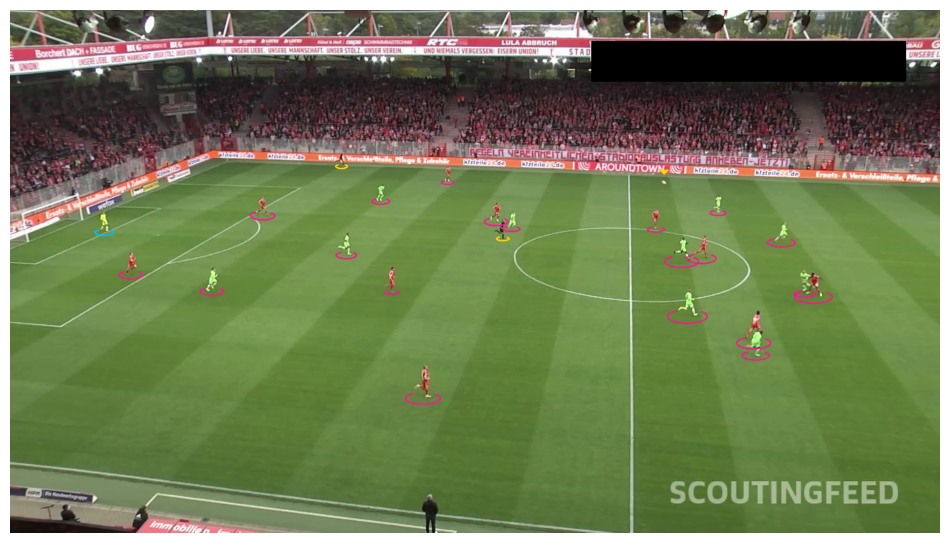

In [15]:
SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
BALL_ID = 0

ellipse_annotator=sv.EllipseAnnotator(
    color = sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
# label_annotator= sv.LabelAnnotator(
#     color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
#     text_color = sv.Color.BLACK
# )

triangle_annotator = sv.TriangleAnnotator(
    color = sv.ColorPalette.from_hex(['#FFD700']),
    base=20, height=10
)

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

results = model(frame, conf = 0.3)[0]
detections = sv.Detections.from_ultralytics(results)

ball_detections = detections[detections.class_id==BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id!=BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1
# labels = [
#     f"{class_name} {confidence:0.2f}"
#     for class_name, confidence
#     in zip(detections['class_name'], detections.confidence)
# ]

annotated_frame=frame.copy()
annotated_frame = ellipse_annotator.annotate(frame, all_detections)
annotated_frame = triangle_annotator.annotate(annotated_frame,ball_detections)

sv.plot_image(annotated_frame)


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 92.3ms
Speed: 9.4ms preprocess, 92.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)


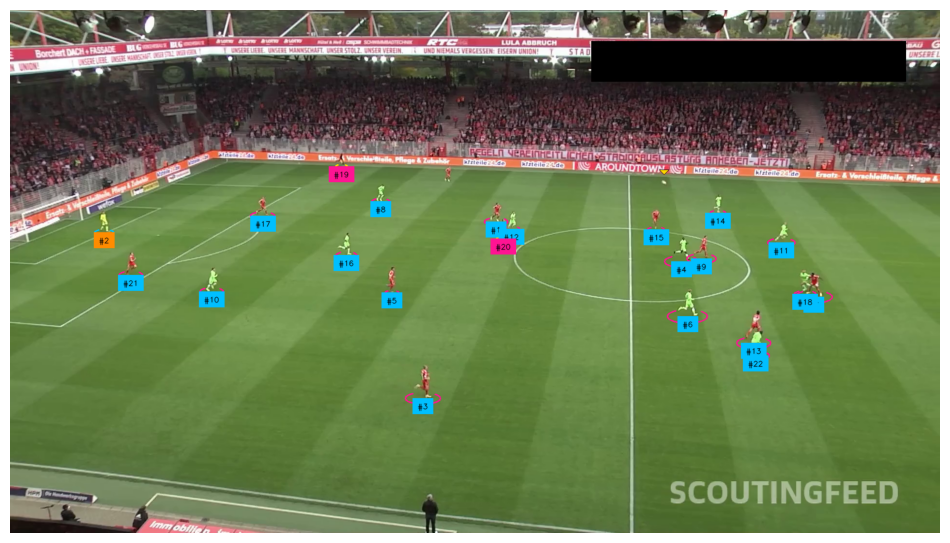

In [16]:
SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
BALL_ID = 0

ellipse_annotator=sv.EllipseAnnotator(
    color = sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator= sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color = sv.Color.BLACK,
    text_position=sv.Position.BOTTOM_CENTER
)

triangle_annotator = sv.TriangleAnnotator(
    color = sv.ColorPalette.from_hex(['#FFD700']),
    base=20, height=10,
    outline_thickness=1
)

tracker = sv.ByteTrack()
tracker.reset()

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

results = model(frame, conf = 0.3)[0]
detections = sv.Detections.from_ultralytics(results)

ball_detections = detections[detections.class_id==BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id!=BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1
all_detections = tracker.update_with_detections(detections=all_detections)

labels = [
    f"#{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections,
    labels=labels)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

sv.plot_image(annotated_frame)

In [17]:
STRIDE=30
PLAYER_ID=2

def extract_crops(source_video_path: str):
  frame_generator=sv.get_video_frames_generator(source_video_path, stride=STRIDE)
  crops=[]
  for frame in frame_generator:
    results=model(frame, conf=0.3)[0]
    detections=sv.Detections.from_ultralytics(results)
    detections=detections.with_nms(threshold=0.5, class_agnostic=True)
    detections=detections[detections.class_id==PLAYER_ID]
    crops+=[
        sv.crop_image(frame, xyxy)
        for xyxy in detections.xyxy
    ]
  return crops

In [18]:
crops=extract_crops(SOURCE_VIDEO_PATH)


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 92.9ms
Speed: 12.9ms preprocess, 92.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.6ms
Speed: 8.3ms preprocess, 92.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 1 goalkeeper, 20 players, 2 referees, 92.8ms
Speed: 8.0ms preprocess, 92.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 20 players, 2 referees, 91.0ms
Speed: 10.2ms preprocess, 91.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 1 ball, 20 players, 2 referees, 93.3ms
Speed: 10.2ms preprocess, 93.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 1 ball, 20 players, 2 referees, 90.1ms
Speed: 9.3ms preprocess, 90.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 20 players, 2 referees, 89.1ms
Speed: 6.9ms preprocess, 89.1ms inf

In [19]:
len(crops)

503

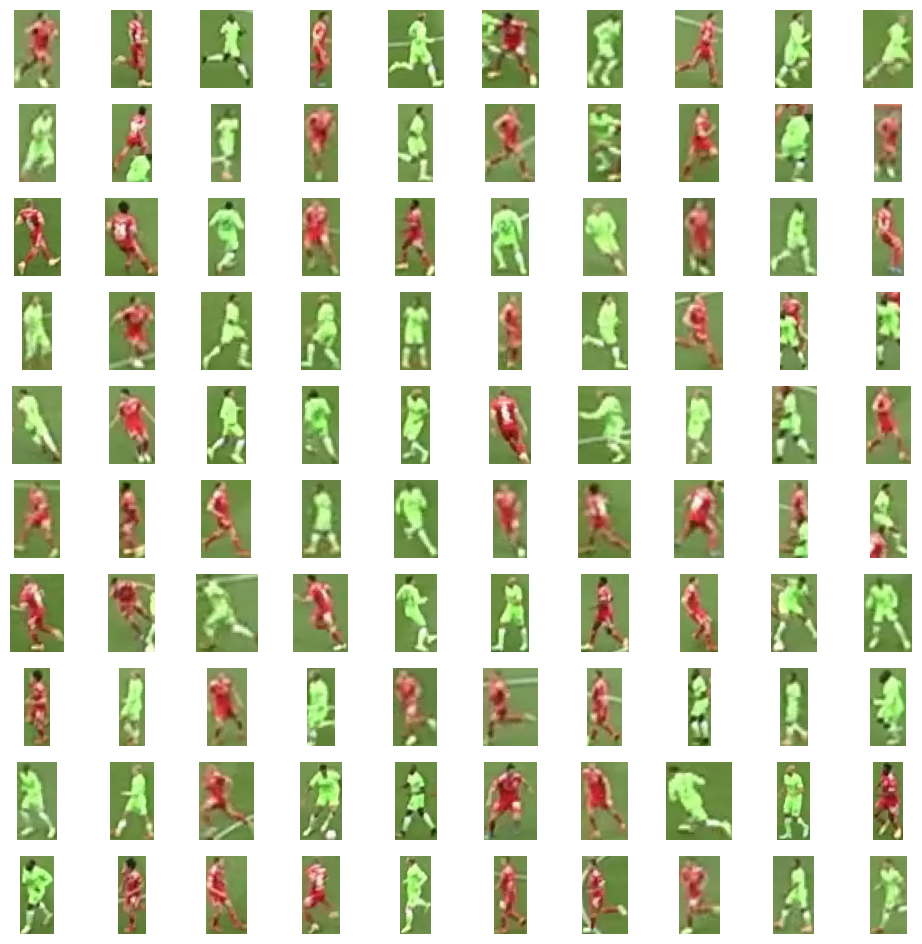

In [20]:
sv.plot_images_grid(crops[:100],grid_size=(10,10))

In [21]:
import torch
from transformers import AutoProcessor, SiglipVisionModel

SIGLIP_MODEL_PATH = 'google/siglip-base-patch16-224'

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
EMBEDDINGS_MODEL = SiglipVisionModel.from_pretrained(SIGLIP_MODEL_PATH).to(DEVICE)
EMBEDDINGS_PROCESSOR = AutoProcessor.from_pretrained(SIGLIP_MODEL_PATH)

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/813M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/711 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.40M [00:00<?, ?B/s]

In [22]:
import numpy as np

from more_itertools import chunked

BATCH_SIZE=32

crops= [sv.cv2_to_pillow(crop) for crop in crops]
batches = chunked(crops, BATCH_SIZE)
data=[]

with torch.no_grad():
  for batch in tqdm(batches, desc='embedding extraction'):
    inputs = EMBEDDINGS_PROCESSOR(images=batch, return_tensors='pt').to(DEVICE)
    outputs = EMBEDDINGS_MODEL(**inputs)
    embeddings = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
    data.append(embeddings)

data = np.concatenate(data)

embedding extraction: 16it [00:06,  2.35it/s]


In [23]:
data.shape

(503, 768)

In [24]:
import umap
from sklearn.cluster import KMeans

REDUCER = umap.UMAP(n_components=2)
CLUSTERING_MODEL = KMeans(n_clusters=2)

In [25]:
projections = REDUCER.fit_transform(data)

In [26]:
projections.shape

(503, 2)

In [27]:
clusters = CLUSTERING_MODEL.fit_predict(projections)

In [28]:
clusters[:10]

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int32)

In [29]:
team_0=[
    crop
    for crop,cluster in zip(crops,clusters)
    if cluster==0
]
team_1=[
    crop
    for crop,cluster in zip(crops,clusters)
    if cluster==1
]

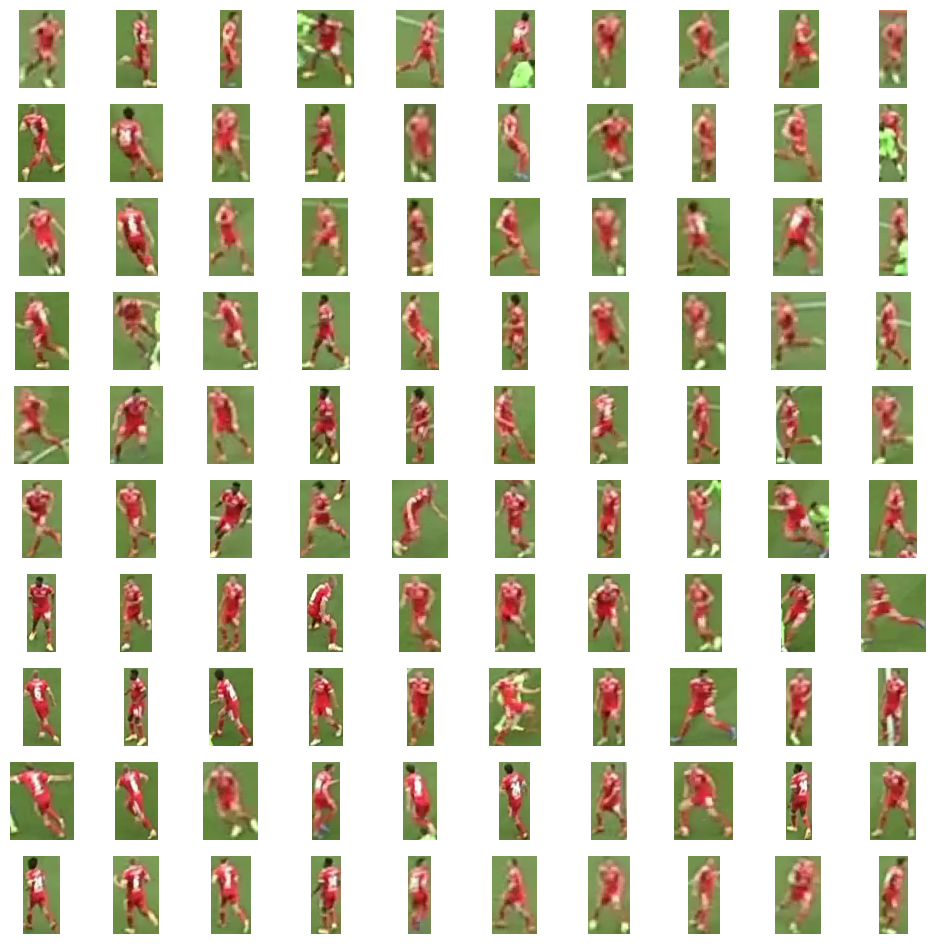

In [30]:
sv.plot_images_grid(team_1[:100],grid_size=(10,10))

In [31]:
def resolve_goalkeeper_team_id(
    player_detections: sv.Detections,
    goalkeeper_detections: sv.Detections,
):

  goalkeepers_xy = goalkeeper_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
  players_xy = player_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)

  team_0_centroid = players_xy[player_detections.class_id==0].mean(axis=0)
  team_1_centroid = players_xy[player_detections.class_id==1].mean(axis=0)

  goalkeepers_team_ids = []
  for goalkeeper_xy in goalkeepers_xy:
    dist_0 = np.linalg.norm(goalkeeper_xy - team_0_centroid)
    dist_1 = np.linalg.norm(goalkeeper_xy - team_1_centroid)
    goalkeepers_team_ids.append(0 if dist_0 < dist_1 else 1)

  return np.array(goalkeepers_team_ids)


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 148.6ms
Speed: 16.8ms preprocess, 148.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 1 goalkeeper, 20 players, 2 referees, 131.3ms
Speed: 9.3ms preprocess, 131.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 1 goalkeeper, 20 players, 2 referees, 106.3ms
Speed: 6.3ms preprocess, 106.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 20 players, 2 referees, 105.8ms
Speed: 17.0ms preprocess, 105.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 1 ball, 20 players, 2 referees, 97.8ms
Speed: 8.5ms preprocess, 97.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 1 ball, 20 players, 2 referees, 93.8ms
Speed: 8.5ms preprocess, 93.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 20 players, 2 referees, 88.7ms
Speed: 7.6ms preprocess, 88.

Embedding extraction: 16it [00:06,  2.38it/s]



0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 141.1ms
Speed: 6.3ms preprocess, 141.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 1088)


Embedding extraction: 1it [00:00,  3.93it/s]


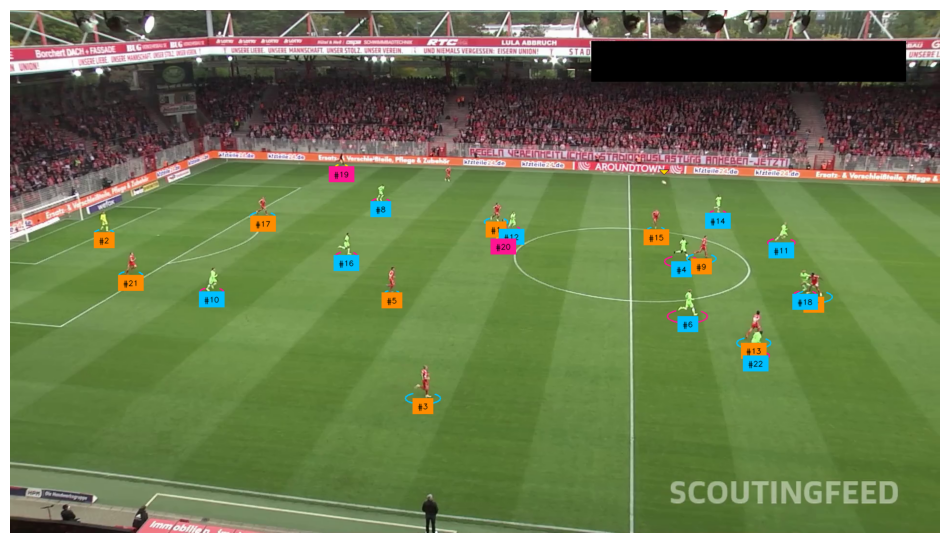

In [32]:
from sports.common.team import TeamClassifier

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
BALL_ID = 0
GOALKEEPER_ID=1
PLAYER_ID=2
REFREE_ID=3

crops = extract_crops(SOURCE_VIDEO_PATH)
team_classifier = TeamClassifier(device=DEVICE)
team_classifier.fit(crops)

ellipse_annotator=sv.EllipseAnnotator(
    color = sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator= sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color = sv.Color.BLACK,
    text_position=sv.Position.BOTTOM_CENTER
)

triangle_annotator = sv.TriangleAnnotator(
    color = sv.ColorPalette.from_hex(['#FFD700']),
    base=20, height=10,
    outline_thickness=1
)

tracker = sv.ByteTrack()
tracker.reset()

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

results = model(frame, conf = 0.3)[0]
detections = sv.Detections.from_ultralytics(results)

ball_detections = detections[detections.class_id==BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id!=BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections = tracker.update_with_detections(detections=all_detections)

player_detections = all_detections[all_detections.class_id == PLAYER_ID]
goalkeeper_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
refree_detections = all_detections[all_detections.class_id == REFREE_ID]

player_crops = [sv.crop_image(frame, xyxy) for xyxy in player_detections.xyxy]
player_detections.class_id = team_classifier.predict(player_crops)

goalkeeper_detections.class_id = resolve_goalkeeper_team_id(
    player_detections, goalkeeper_detections
)

refree_detections.class_id -= 1

all_detections = sv.Detections.merge([player_detections, goalkeeper_detections, refree_detections])

labels = [
    f"#{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]

all_detections.class_id = all_detections.class_id.astype(int)

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections,
    labels=labels)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

sv.plot_image(annotated_frame)

In [33]:
!pip install -q gdown inference-gpu

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.8/725.8 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.0/906.0 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.5/383.5 kB 28.7 MB/s eta 0:00:00
 

In [34]:
from inference import get_model

FIELD_DETECTION_MODEL_ID = "football-field-detection-f07vi/14"
FIELD_DETECTION_MODEL = get_model(model_id=FIELD_DETECTION_MODEL_ID, api_key="eSCang8WY4Z1vQlZeH9h")

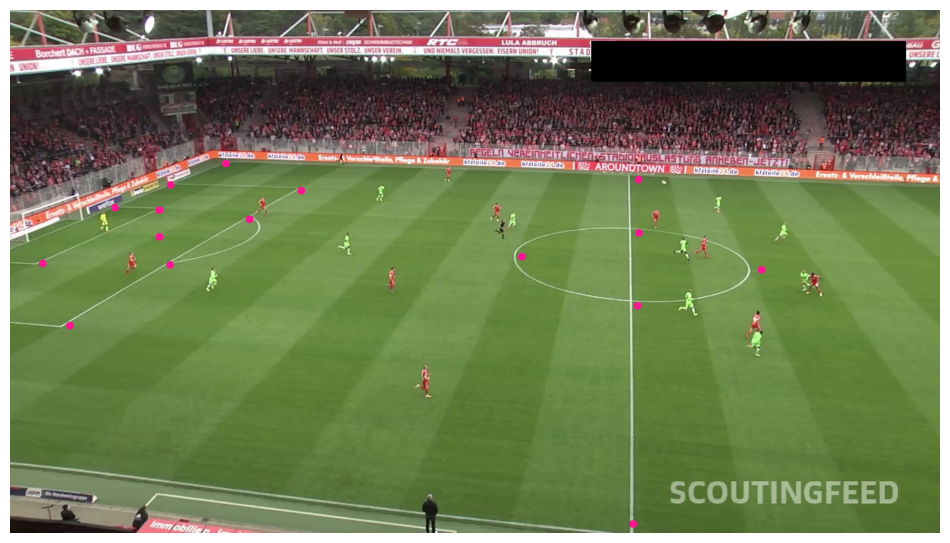

In [38]:
vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex("#FF1493"),
    radius=8
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

results = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
key_points = sv.KeyPoints.from_inference(results)

filter = key_points.confidence[0]>0.5
frame_reference_points = key_points.xy[0][filter]
frame_reference_key_points = sv.KeyPoints(xy=frame_reference_points[np.newaxis, ...])

annotated_frame = frame.copy()
annotated_frame = vertex_annotator.annotate(annotated_frame, frame_reference_key_points)

sv.plot_image(annotated_frame)

In [39]:
TARGET_VIDEO_PATH = "/content/121364_0_results_for_keypoint_detection.mp4"

keypoint detection on whole video

In [41]:
# vertex_annotator = sv.VertexAnnotator(
#     color=sv.Color.from_hex("#FF1493"),
#     radius=8
# )

# video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

# with video_sink:
#   for frame in tqdm(frame_generator, total=video_info.total_frames):
#     results = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
#     key_points = sv.KeyPoints.from_inference(results)

#     filter =key_points.confidence[0]>0.5
#     frame_reference_points = key_points.xy[0][filter]
#     frame_reference_key_points = sv.KeyPoints(xy=frame_reference_points[np.newaxis, ...])

#     annotated_frame = frame.copy()
#     annotated_frame = vertex_annotator.annotate(annotated_frame, frame_reference_key_points)
#     video_sink.write_frame(annotated_frame)

 97%|█████████▋| 725/750 [31:03<01:04,  2.57s/it]


In [42]:
key_points.confidence[0]

array([    0.99791,     0.99973,     0.99927,     0.81771,    0.043958,   0.0011439,     0.99983,     0.97882,     0.99979,     0.99984,     0.99994,      0.9998,      0.9929,    0.013914,    0.012098,    0.020285,  0.00049245,  8.9407e-08,  1.4901e-07,  4.1723e-07,  3.5763e-07,  5.3644e-07,  4.7684e-07,  2.6822e-07,
        9.2387e-07,  5.6624e-07,  1.0729e-06,           0,  2.9802e-08,  3.5763e-07,     0.83243,  2.3752e-05], dtype=float32)

In [43]:
# project pitch lines on frame
from sports.configs.soccer import SoccerPitchConfiguration

CONFIG = SoccerPitchConfiguration()

In [44]:
CONFIG.vertices

[(0, 0),
 (0, 1450.0),
 (0, 2584.0),
 (0, 4416.0),
 (0, 5550.0),
 (0, 7000),
 (550, 2584.0),
 (550, 4416.0),
 (1100, 3500.0),
 (2015, 1450.0),
 (2015, 2584.0),
 (2015, 4416.0),
 (2015, 5550.0),
 (6000.0, 0),
 (6000.0, 2585.0),
 (6000.0, 4415.0),
 (6000.0, 7000),
 (9985, 1450.0),
 (9985, 2584.0),
 (9985, 4416.0),
 (9985, 5550.0),
 (10900, 3500.0),
 (11450, 2584.0),
 (11450, 4416.0),
 (12000, 0),
 (12000, 1450.0),
 (12000, 2584.0),
 (12000, 4416.0),
 (12000, 5550.0),
 (12000, 7000),
 (5085.0, 3500.0),
 (6915.0, 3500.0)]

In [45]:
CONFIG.edges

[(1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (7, 8),
 (10, 11),
 (11, 12),
 (12, 13),
 (14, 15),
 (15, 16),
 (16, 17),
 (18, 19),
 (19, 20),
 (20, 21),
 (23, 24),
 (25, 26),
 (26, 27),
 (27, 28),
 (28, 29),
 (29, 30),
 (1, 14),
 (2, 10),
 (3, 7),
 (4, 8),
 (5, 13),
 (6, 17),
 (14, 25),
 (18, 26),
 (23, 27),
 (24, 28),
 (21, 29),
 (17, 30)]

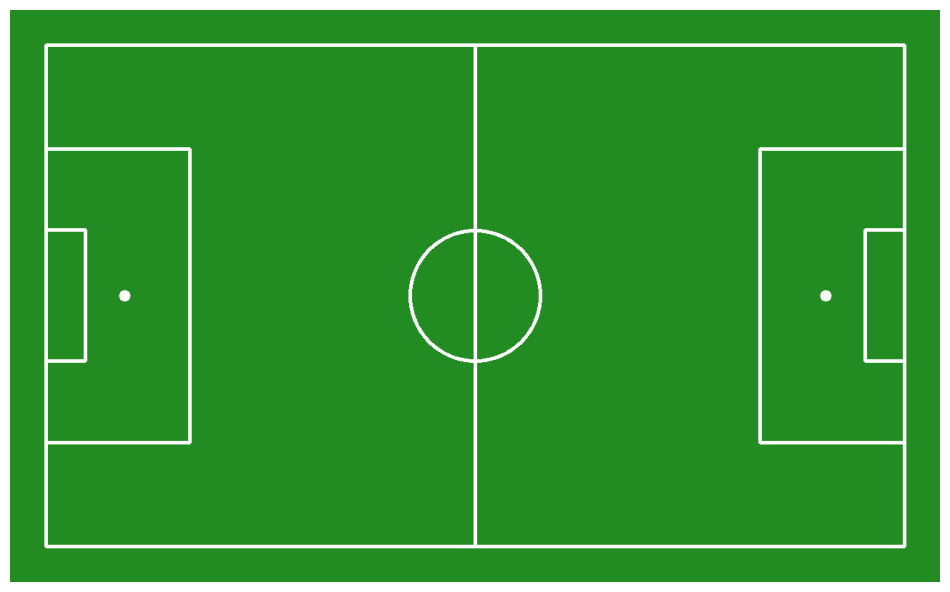

In [47]:
from sports.annotators.soccer import draw_pitch

anntated_frame = draw_pitch(CONFIG)

sv.plot_image(anntated_frame)

In [52]:
import cv2

class ViewTransformer:
  def __init__(self, source:np.ndarray,target:np.ndarray):
    source = source.astype(np.float32)
    target = target.astype(np.float32)
    self.m,_ = cv2.findHomography(source, target)

  def transform_points(self, points: np.ndarray) -> np.ndarray:
    points = points.reshape(-1,1,2).astype(np.float32)
    points = cv2.perspectiveTransform(points,self.m)
    return points.reshape(-1,2).astype(np.float32)

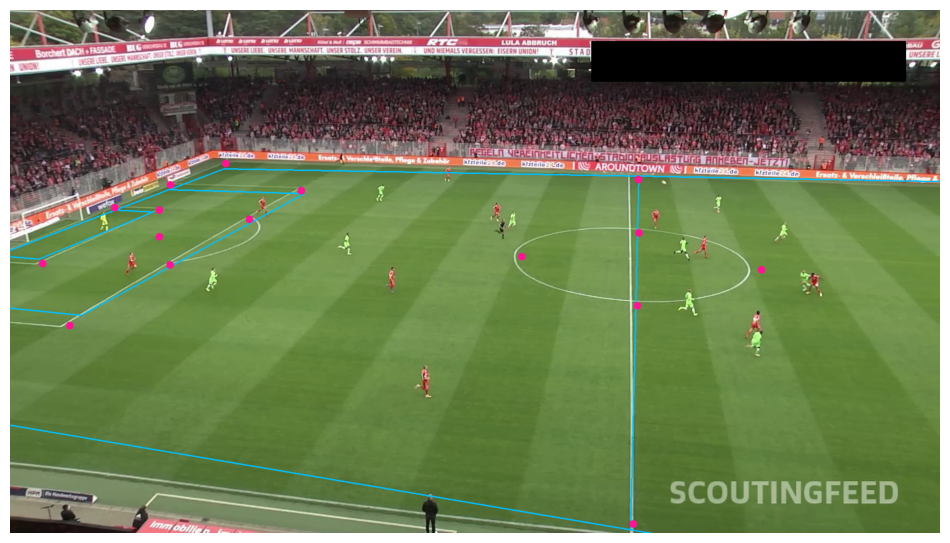

In [53]:
vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex("#FF1493"),
    radius=8
)

edge_annotator = sv.EdgeAnnotator(
    color = sv.Color.from_hex("00BFFF"),
    thickness=2,
    edges= CONFIG.edges
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

results = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
key_points = sv.KeyPoints.from_inference(results)

filter = key_points.confidence[0]>0.5
frame_reference_points = key_points.xy[0][filter]
frame_reference_key_points = sv.KeyPoints(xy=frame_reference_points[np.newaxis, ...])
pitch_reference_points = np.array(CONFIG.vertices)[filter]

view_transformer = ViewTransformer(
    source=pitch_reference_points,
    target=frame_reference_points
)

pitch_all_points = np.array(CONFIG.vertices)
frame_all_points = view_transformer.transform_points(pitch_all_points)
frame_all_key_points = sv.KeyPoints(xy=frame_all_points[np.newaxis, ...])

annotated_frame = frame.copy()
annotated_frame = edge_annotator.annotate(annotated_frame, frame_all_key_points)
annotated_frame = vertex_annotator.annotate(annotated_frame, frame_reference_key_points)

sv.plot_image(annotated_frame)


0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 150.7ms
Speed: 7.6ms preprocess, 150.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 1 goalkeeper, 20 players, 2 referees, 133.5ms
Speed: 16.0ms preprocess, 133.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 1 goalkeeper, 20 players, 2 referees, 113.6ms
Speed: 17.5ms preprocess, 113.6ms inference, 7.8ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 20 players, 2 referees, 96.6ms
Speed: 13.9ms preprocess, 96.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 1 ball, 20 players, 2 referees, 94.1ms
Speed: 11.2ms preprocess, 94.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 1 ball, 20 players, 2 referees, 89.7ms
Speed: 17.1ms preprocess, 89.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 1088)

0: 640x1088 20 players, 2 referees, 89.5ms
Speed: 17.7ms preprocess, 8

Embedding extraction: 16it [00:10,  1.57it/s]



0: 640x1088 1 ball, 1 goalkeeper, 20 players, 2 referees, 152.1ms
Speed: 25.6ms preprocess, 152.1ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 1088)


Embedding extraction: 1it [00:00,  2.70it/s]


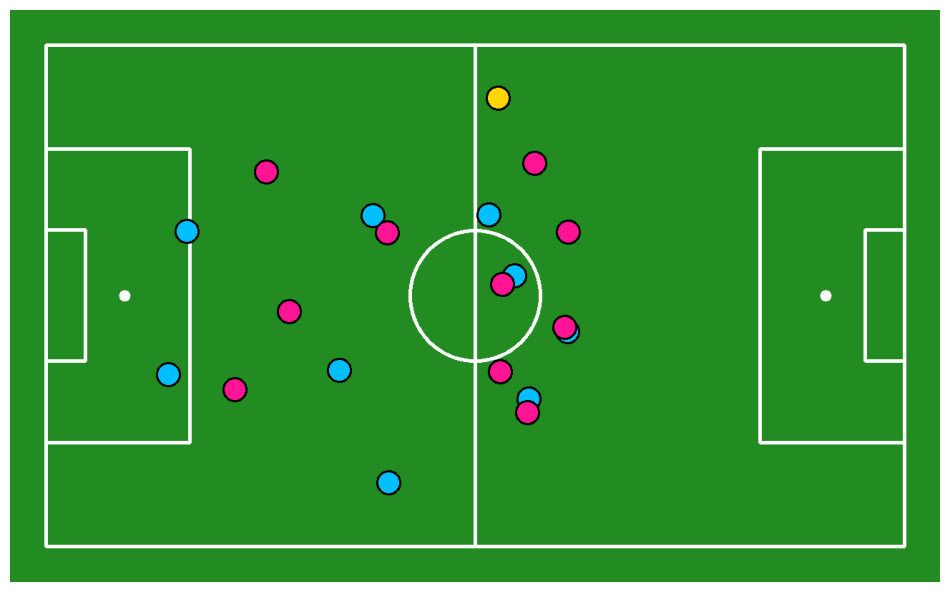

In [57]:
from sports.common.team import TeamClassifier
from sports.annotators.soccer import draw_pitch,draw_points_on_pitch

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
BALL_ID = 0
GOALKEEPER_ID=1
PLAYER_ID=2
REFREE_ID=3

crops = extract_crops(SOURCE_VIDEO_PATH)
team_classifier = TeamClassifier(device=DEVICE)
team_classifier.fit(crops)

tracker = sv.ByteTrack()
tracker.reset()

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

results = model(frame, conf = 0.3)[0]
detections = sv.Detections.from_ultralytics(results)

ball_detections = detections[detections.class_id==BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id!=BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections = tracker.update_with_detections(detections=all_detections)

player_detections = all_detections[all_detections.class_id == PLAYER_ID]
goalkeeper_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
refree_detections = all_detections[all_detections.class_id == REFREE_ID]

player_crops = [sv.crop_image(frame, xyxy) for xyxy in player_detections.xyxy]
player_detections.class_id = team_classifier.predict(player_crops)

goalkeeper_detections.class_id = resolve_goalkeeper_team_id(
    player_detections, goalkeeper_detections
)

results = FIELD_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
key_points = sv.KeyPoints.from_inference(results)

filter = key_points.confidence[0]>0.5
frame_reference_points = key_points.xy[0][filter]
frame_reference_key_points = sv.KeyPoints(xy=frame_reference_points[np.newaxis, ...])
pitch_reference_points = np.array(CONFIG.vertices)[filter]

view_transformer = ViewTransformer(
    source=frame_reference_points,
    target=pitch_reference_points
)

frame_ball_xy = ball_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_ball_xy = view_transformer.transform_points(frame_ball_xy)

frame_player_xy = player_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_player_xy = view_transformer.transform_points(frame_player_xy)

frame_referee_xy = ball_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_referee_xy = view_transformer.transform_points(frame_referee_xy)

pitch = draw_pitch(config= CONFIG)
pitch = draw_points_on_pitch(
 config=CONFIG,
 xy=pitch_ball_xy,
 face_color=sv.Color.WHITE,
 edge_color=sv.Color.BLACK,
 radius=10,
 pitch=pitch
)

pitch = draw_points_on_pitch(
 config=CONFIG,
 xy=pitch_player_xy[player_detections.class_id==0],
 face_color=sv.Color.from_hex("00BFFF"),
 edge_color=sv.Color.BLACK,
 radius=16,
 pitch=pitch
)

pitch = draw_points_on_pitch(
 config=CONFIG,
 xy=pitch_player_xy[player_detections.class_id==1],
 face_color=sv.Color.from_hex("FF1493"),
 edge_color=sv.Color.BLACK,
 radius=16,
 pitch=pitch
)

pitch = draw_points_on_pitch(
 config=CONFIG,
 xy=pitch_referee_xy,
 face_color=sv.Color.from_hex("FFD700"),
 edge_color=sv.Color.BLACK,
 radius=16,
 pitch=pitch
)
sv.plot_image(pitch)